<a href="https://colab.research.google.com/github/chandrakar-shubham/health-insurance-cross-sell-prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing database into dataframe

file_path = '/content/drive/MyDrive/Capstone projects/Health insurance cross sell/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(file_path)

In [4]:
# top 5 column in df

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# top 5 column in df

df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


Checking for duplicate rows

In [6]:
#check for duplicate rows

len(df[df.duplicated()])

0

Checking for null values

In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.describe([0.75,0.90,0.99])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
90%,342998.200000,62.000000,1.000000,46.000000,1.000000,48431.000000,156.000000,270.000000,1.000000
99%,377297.920000,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Peaking at dependent variable distribution

dependent variable = Response

        It can be seen that data is heavily imbalanced.

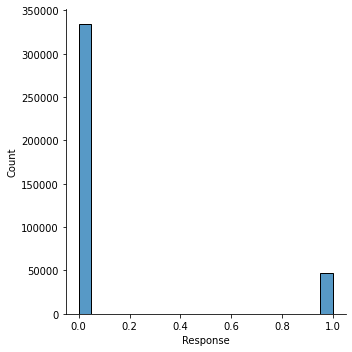

In [9]:
# distribution of dependent variable

sns.displot(df['Response'])

In [10]:
#value count each type of response

df['Response'].value_counts()


0    334399
1     46710
Name: Response, dtype: int64

Feature engineering

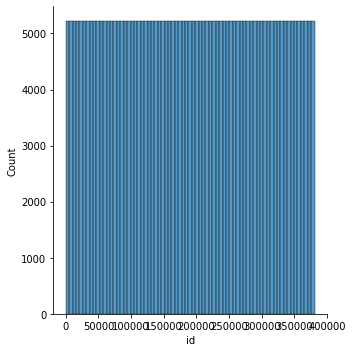

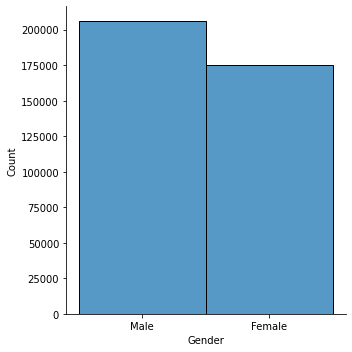

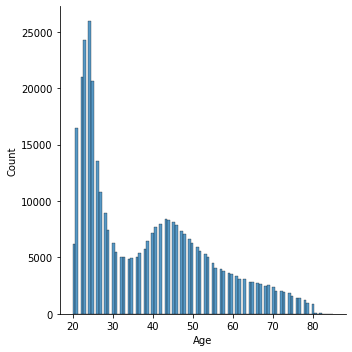

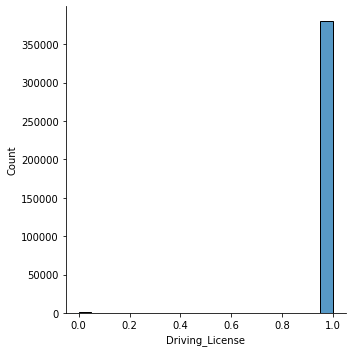

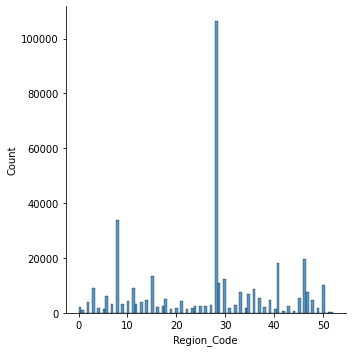

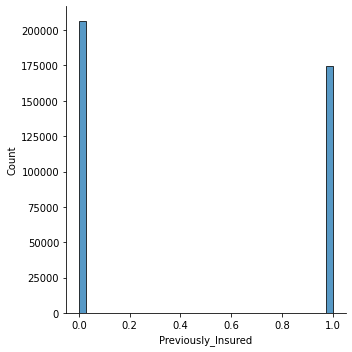

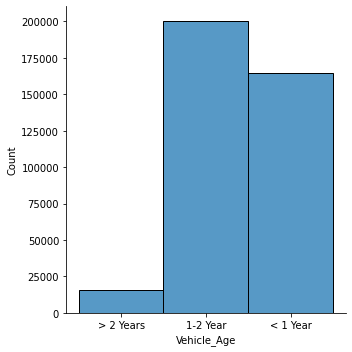

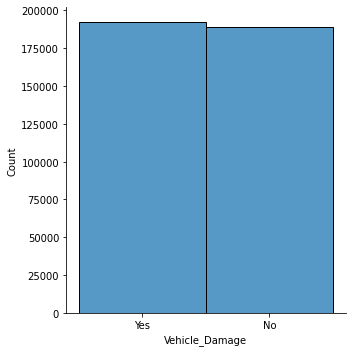

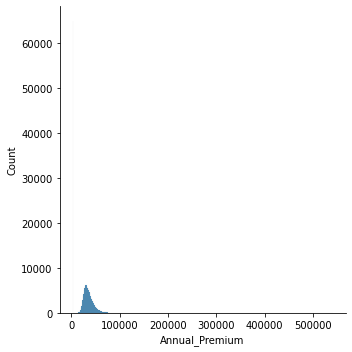

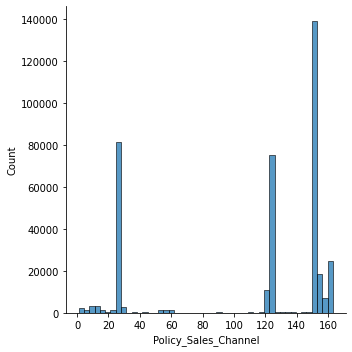

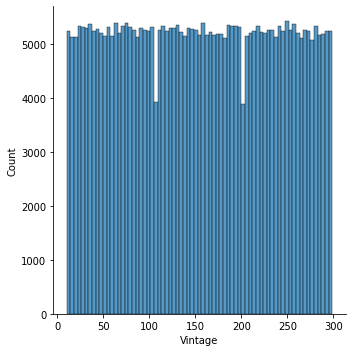

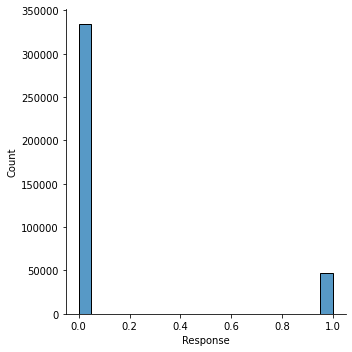

In [11]:
#distribution plot of all features

for col in df.columns:
  #plt.xticks(rotation = 90)
  sns.displot(df[col])

In [12]:
# dropping id feature

df.drop(columns='id',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [14]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [15]:
#changing data type 
df['Region_Code'] = df['Region_Code'].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  int64  
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  int64  
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 32.0+ MB


In [17]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


Correlation analysis

In [18]:
#checking correlation

df.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


Visualising correlation





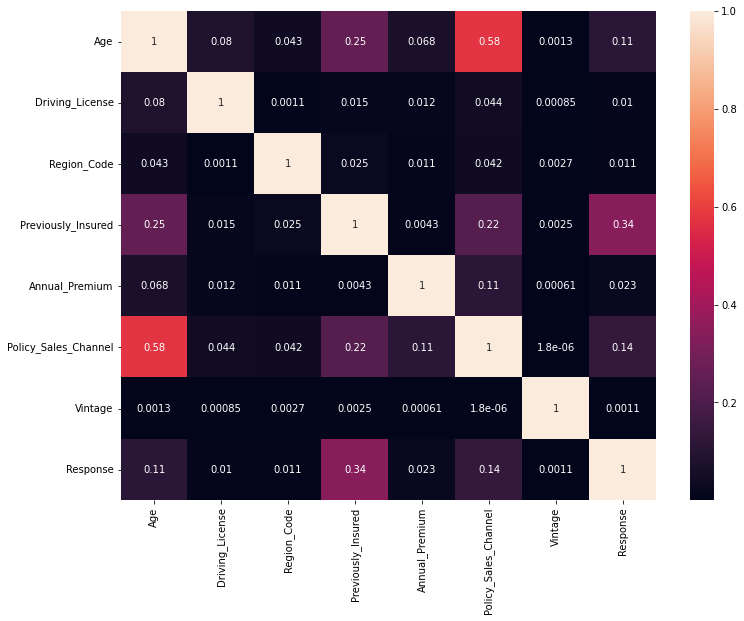

In [19]:
plt.figure(figsize=(12,9))
sns.heatmap(abs(df.corr()),annot=True)

In [20]:
#drop vintage

df.drop(columns = 'Vintage',inplace = True)

In [21]:
def age_to_agegroup(age):

  '''convert age to age group'''

  if age < 35:
    return 'youth'
  elif age >= 35 and age <50:
    return 'middle aged'
  elif age >=50 and age <62:
    return 'senior'
  else:
    return 'super senior'

In [22]:
df['age_group'] = df['Age'].apply(age_to_agegroup)
df.drop(columns='Age',inplace=True)


Outlier removal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


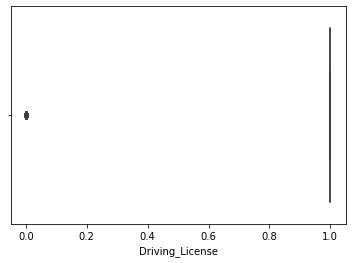

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


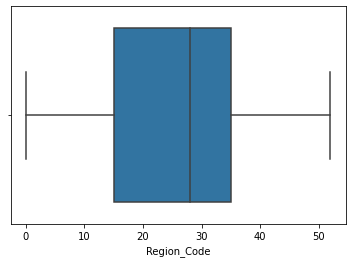

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


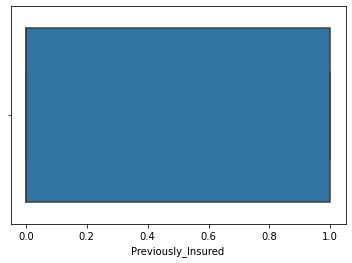

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


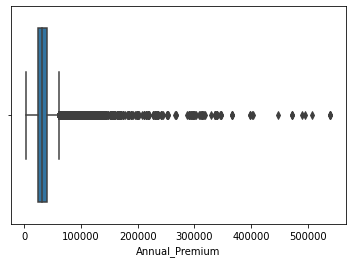

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


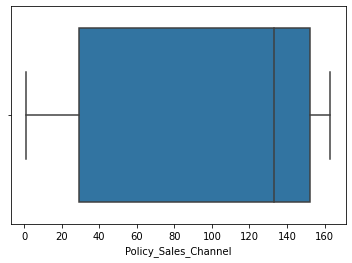

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


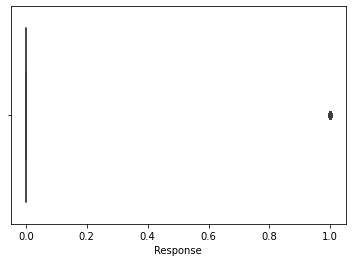

In [23]:
# box plot to detect outliers
for col in df.describe().columns:
  sns.boxplot(df[col])
  plt.show()

In [24]:
def calculate_iqr(col):
  
  '''to calculate up_limit and lower limit of IQR'''
  
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  up_limit = 1.5 * iqr + q3
  low_limit = q1 - 1.5 * iqr

  return up_limit,low_limit,q1,q3

In [25]:
#remove outiers from Annual Premium feature

up_limit,low_limit,q1,q3= calculate_iqr('Annual_Premium')
print(up_limit,low_limit,q1,q3)


df=df[(df['Annual_Premium'] < up_limit) & (df['Annual_Premium'] > low_limit) ]

61892.5 1912.5 24405.0 39400.0


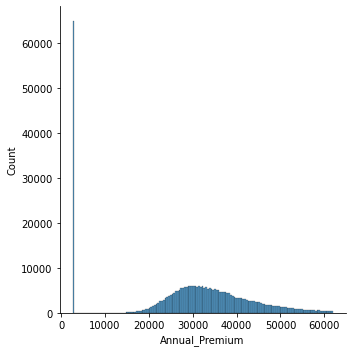

In [26]:
sns.displot(df['Annual_Premium'])

#EDA on dataset

Univariate analysis

 Following are the key findings:
 1. Male customers are more than female customers.
 2. Most of the people have driving licencse
 3. Most of the customers are in age group less than 28
 4. Most vehicle insured are 1-2 years old
 5. More than 50% people reported vehicle damage
 6. Most of the customers have negative response as compared to positive response
 7. Most of the people were not previously insured
 8. Major customers are youth followed by middle aged

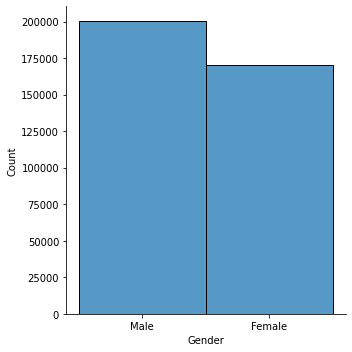

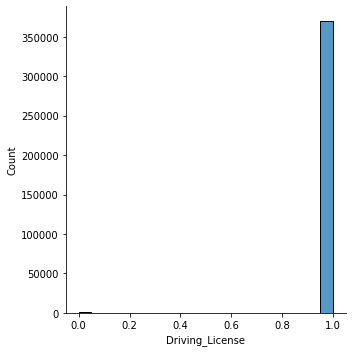

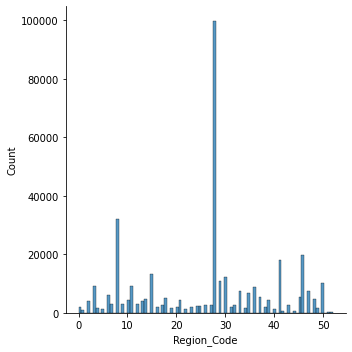

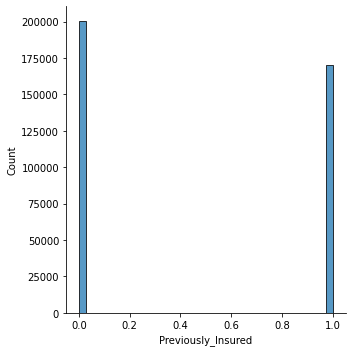

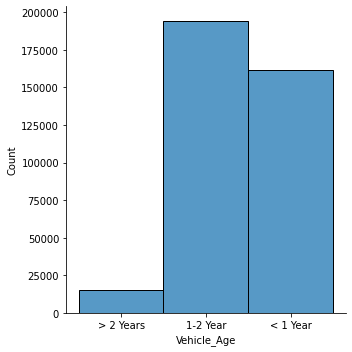

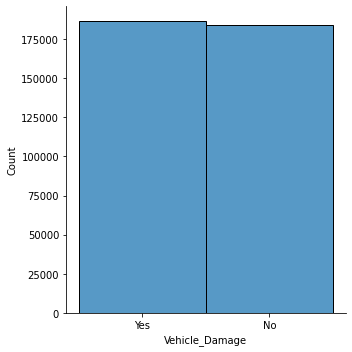

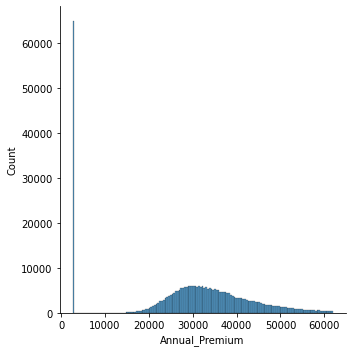

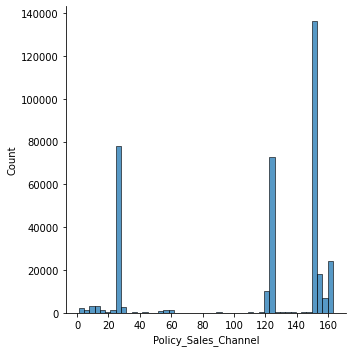

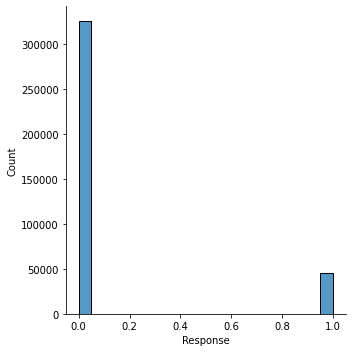

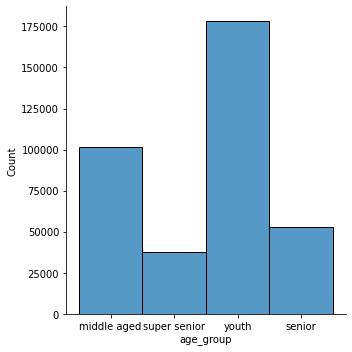

In [27]:
#distribution plot of all features

for col in df.columns:
  #plt.xticks(rotation = 90)
  sns.displot(df[col])

Count plot to check count of features

In [28]:
all_features = list(df.columns)
print(all_features)

numerical_features = ['Annual_Premium']
print(numerical_features)

categorical_features = [var for var in all_features if var not in numerical_features]
print(categorical_features)


['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Response', 'age_group']
['Annual_Premium']
['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response', 'age_group']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


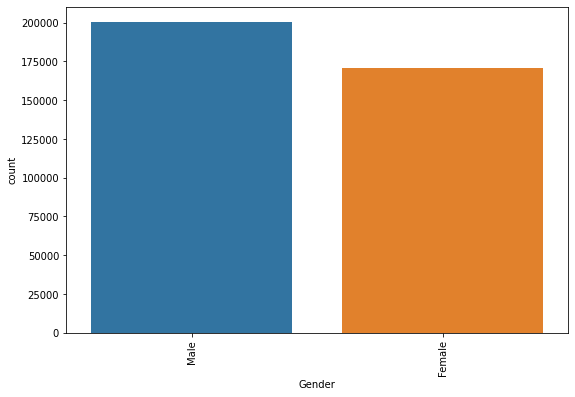

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


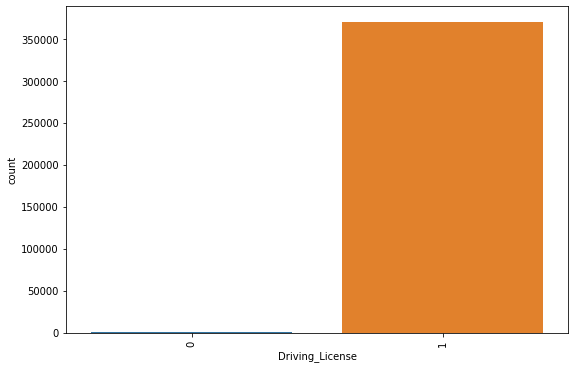

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


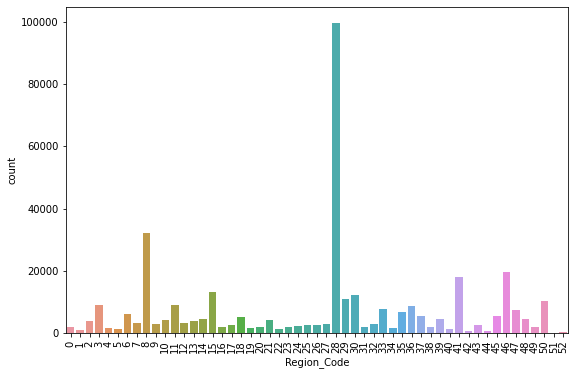

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


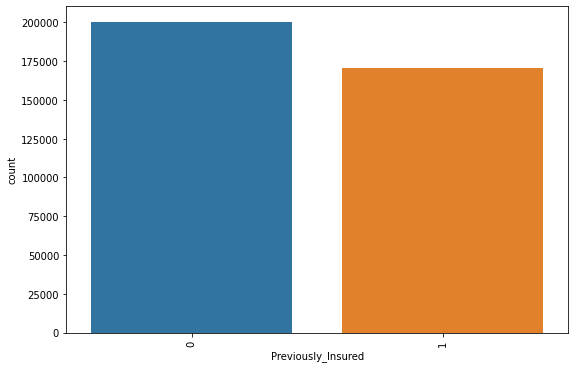

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


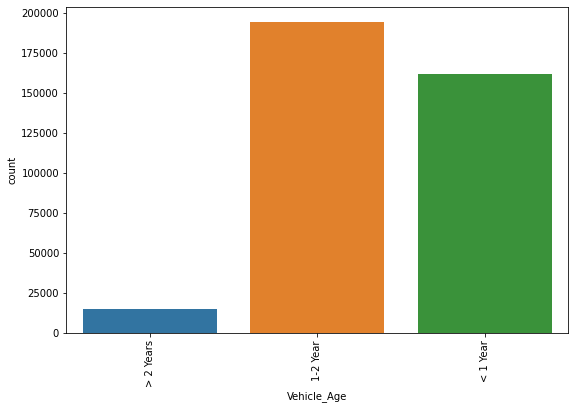

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


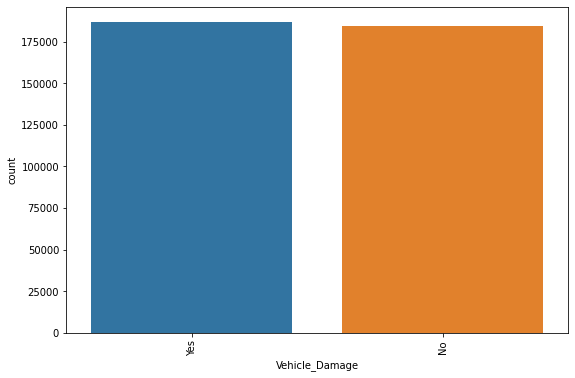

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


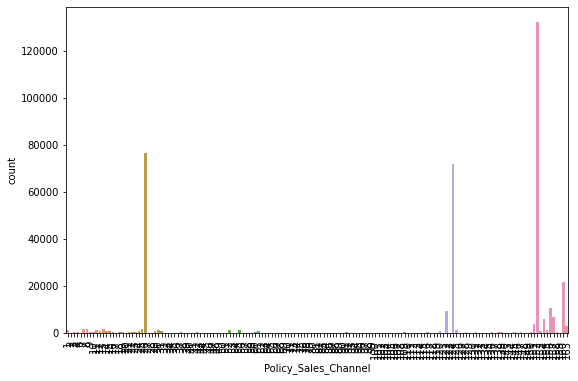

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


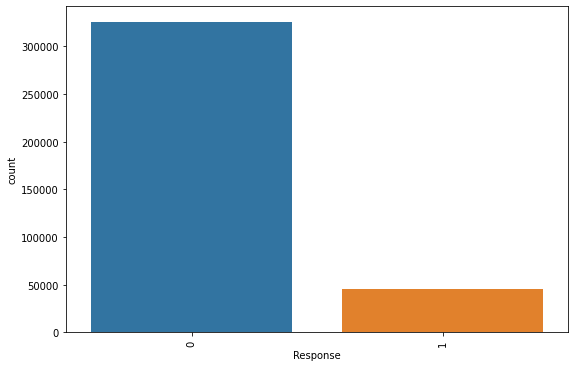

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


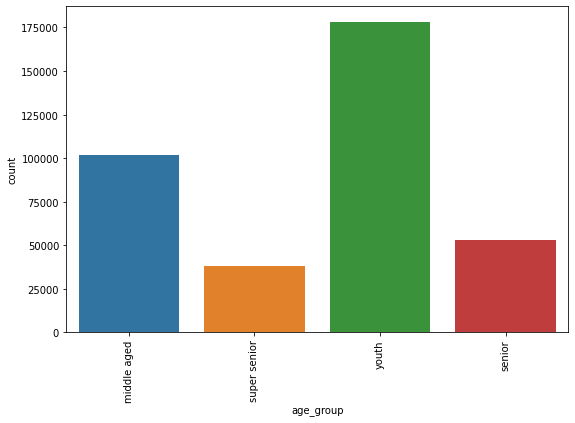

In [29]:
for col in categorical_features:
  plt.figure(figsize = (9,6))
  plt.xticks(rotation =90)
  sns.countplot(df[col])
  plt.show()

Bivariate analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                370789 non-null  object 
 1   Driving_License       370789 non-null  int64  
 2   Region_Code           370789 non-null  int64  
 3   Previously_Insured    370789 non-null  int64  
 4   Vehicle_Age           370789 non-null  object 
 5   Vehicle_Damage        370789 non-null  object 
 6   Annual_Premium        370789 non-null  float64
 7   Policy_Sales_Channel  370789 non-null  int64  
 8   Response              370789 non-null  int64  
 9   age_group             370789 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 39.2+ MB


Relation between Vehicle age and annual premium

       Key findings:
       1. With age of vehicle premium increases
       2. Mean annual premium is highest for vehicle older than 2 years

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


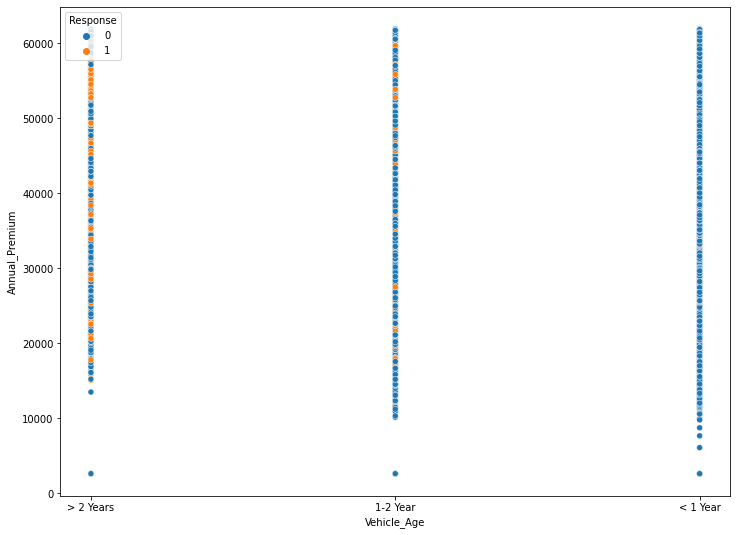

In [31]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=df,x='Vehicle_Age',y=df['Annual_Premium'],hue='Response')

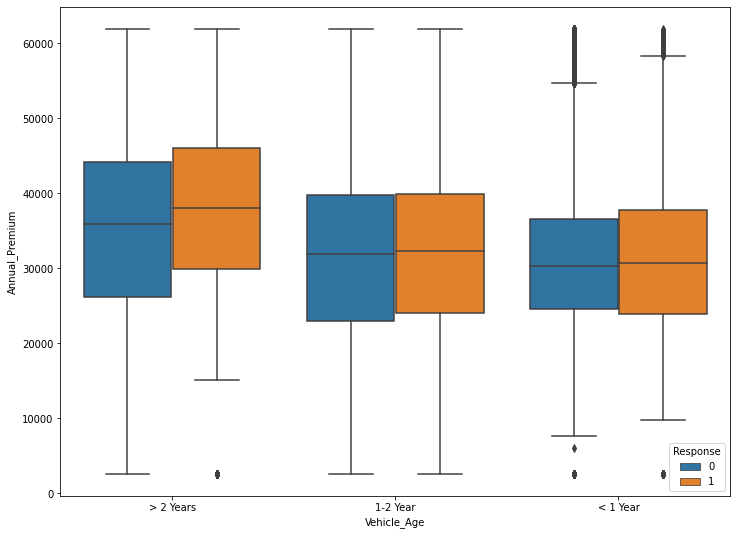

In [32]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df,x='Vehicle_Age',y=df['Annual_Premium'],hue='Response')

Age group and Response

1. Middle aged people are most resposive followed by senior.
2. Least responsive age group is youth

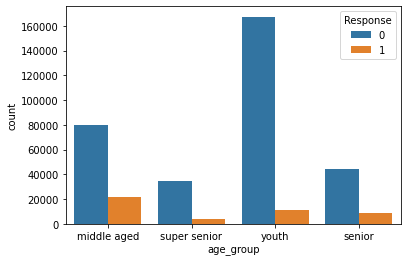

In [33]:
sns.countplot(data=df,x='age_group',hue='Response')

Vehicle damage and response

         People who had vehicle damage are mostly showing respose in comparision to people with no vehicle damage who are showing negligible response

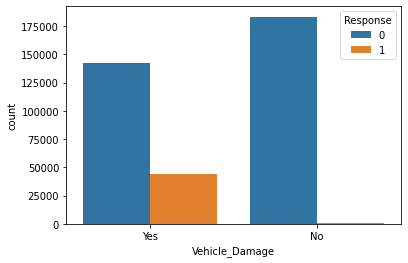

In [34]:
sns.countplot(data=df,x='Vehicle_Damage',hue='Response')

Previously insured and response

          People who were previously insured are mostly showing respose in comparision to people were not previously insured are showing negligible response

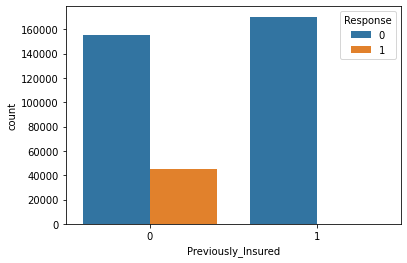

In [35]:
sns.countplot(data=df,x='Previously_Insured',hue='Response')

Gender and response

          Both gender are showing somehow equal response

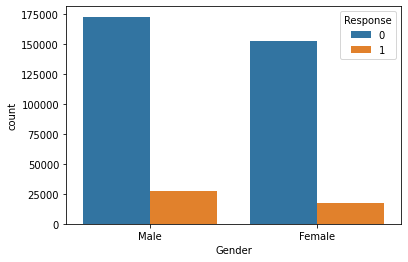

In [36]:
sns.countplot(data=df,x='Gender',hue='Response')

Policy_sales_channel and response

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                370789 non-null  object 
 1   Driving_License       370789 non-null  int64  
 2   Region_Code           370789 non-null  int64  
 3   Previously_Insured    370789 non-null  int64  
 4   Vehicle_Age           370789 non-null  object 
 5   Vehicle_Damage        370789 non-null  object 
 6   Annual_Premium        370789 non-null  float64
 7   Policy_Sales_Channel  370789 non-null  int64  
 8   Response              370789 non-null  int64  
 9   age_group             370789 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 39.2+ MB


In [38]:
df.groupby('Policy_Sales_Channel')['Response'].sum().sort_values(ascending=False)

Policy_Sales_Channel
26     15083
124    13638
152     3801
156     2278
157     1780
       ...  
115        0
117        0
118        0
34         0
102        0
Name: Response, Length: 155, dtype: int64

In [39]:
channel_response = pd.DataFrame(df.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False).reset_index())
channel_response

,Policy_Sales_Channel,Response
0,123,1.000000
1,43,1.000000
2,27,0.333333
3,80,0.333333
4,28,0.333333
...,...,...
150,117,0.000000
151,50,0.000000
152,137,0.000000
153,74,0.000000


In [40]:
#No of channel with generated 1 response

len(channel_response[channel_response['Response']>0])

119

In [41]:
#No of channel with generated 0 response

len(channel_response[channel_response['Response']==0])

36

In [42]:
#channel which more than 30% conversion rate

channel_response[channel_response['Response']>0.20]

,Policy_Sales_Channel,Response
0,123,1.000000
1,43,1.000000
2,27,0.333333
3,80,0.333333
4,28,0.333333
5,155,0.321192
6,121,0.306452
7,36,0.306122
8,163,0.303571
9,3,0.298354


In [43]:
#channel which more than 20% conversion rate

channel_response[channel_response['Response']>0.20]

,Policy_Sales_Channel,Response
0,123,1.000000
1,43,1.000000
2,27,0.333333
3,80,0.333333
4,28,0.333333
5,155,0.321192
6,121,0.306452
7,36,0.306122
8,163,0.303571
9,3,0.298354


In [44]:
#channel which more than 10% conversion rate

channel_response[channel_response['Response']>0.10]

,Policy_Sales_Channel,Response
0,123,1.000000
1,43,1.000000
2,27,0.333333
3,80,0.333333
4,28,0.333333
...,...,...
73,32,0.105263
74,148,0.105263
75,60,0.103922
76,14,0.102819


Region code and response

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                370789 non-null  object 
 1   Driving_License       370789 non-null  int64  
 2   Region_Code           370789 non-null  int64  
 3   Previously_Insured    370789 non-null  int64  
 4   Vehicle_Age           370789 non-null  object 
 5   Vehicle_Damage        370789 non-null  object 
 6   Annual_Premium        370789 non-null  float64
 7   Policy_Sales_Channel  370789 non-null  int64  
 8   Response              370789 non-null  int64  
 9   age_group             370789 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 39.2+ MB


In [46]:
region_response = pd.DataFrame(df.groupby('Region_Code')['Response'].mean().sort_values(ascending=False).reset_index())
region_response

,Region_Code,Response
0,38,0.192423
1,28,0.187526
2,19,0.162973
3,4,0.157572
4,23,0.152707
5,51,0.149425
6,24,0.141611
7,7,0.132260
8,18,0.130987
9,3,0.128325


In [47]:
#Region with top 10 response
region_response[:10]

,Region_Code,Response
0,38,0.192423
1,28,0.187526
2,19,0.162973
3,4,0.157572
4,23,0.152707
5,51,0.149425
6,24,0.141611
7,7,0.132260
8,18,0.130987
9,3,0.128325


# VIF analysis

In [48]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [49]:
# check multicollinearity, VIF must be less than 10

calc_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,Driving_License,14.527652
1,Region_Code,4.912233
2,Previously_Insured,1.945179
3,Annual_Premium,4.949969
4,Policy_Sales_Channel,5.670297


In [50]:
df.drop(columns=['Driving_License','Policy_Sales_Channel','Region_Code'],inplace=True)

In [51]:
df.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,age_group
0,Male,0,> 2 Years,Yes,40454.0,1,middle aged
1,Male,0,1-2 Year,No,33536.0,0,super senior
2,Male,0,> 2 Years,Yes,38294.0,1,middle aged
3,Male,1,< 1 Year,No,28619.0,0,youth
4,Female,1,< 1 Year,No,27496.0,0,youth


#Categorical encoding

In [52]:
#creating copy of df

df1=df.copy()

In [53]:
df1=pd.get_dummies(df1,columns=['Gender','Previously_Insured','Vehicle_Age','age_group','Vehicle_Damage'])

#Building ML models

In [54]:
pd.set_option('display.max_rows', 500)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Annual_Premium          370789 non-null  float64
 1   Response                370789 non-null  int64  
 2   Gender_Female           370789 non-null  uint8  
 3   Gender_Male             370789 non-null  uint8  
 4   Previously_Insured_0    370789 non-null  uint8  
 5   Previously_Insured_1    370789 non-null  uint8  
 6   Vehicle_Age_1-2 Year    370789 non-null  uint8  
 7   Vehicle_Age_< 1 Year    370789 non-null  uint8  
 8   Vehicle_Age_> 2 Years   370789 non-null  uint8  
 9   age_group_middle aged   370789 non-null  uint8  
 10  age_group_senior        370789 non-null  uint8  
 11  age_group_super senior  370789 non-null  uint8  
 12  age_group_youth         370789 non-null  uint8  
 13  Vehicle_Damage_No       370789 non-null  uint8  
 14  Vehicle_Damage_Yes  

In [56]:
df1.head()

,Annual_Premium,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,age_group_middle aged,age_group_senior,age_group_super senior,age_group_youth,Vehicle_Damage_No,Vehicle_Damage_Yes
0,40454.0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
1,33536.0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
2,38294.0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
3,28619.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
4,27496.0,0,1,0,0,1,0,1,0,0,0,0,1,1,0


In [57]:
dependent_features = ['Response']

independent_features = [col for col in df1.columns if col not in dependent_features]

In [58]:
dependent_features

['Response']

In [59]:
independent_features

['Annual_Premium',
 'Gender_Female',
 'Gender_Male',
 'Previously_Insured_0',
 'Previously_Insured_1',
 'Vehicle_Age_1-2 Year',
 'Vehicle_Age_< 1 Year',
 'Vehicle_Age_> 2 Years',
 'age_group_middle aged',
 'age_group_senior',
 'age_group_super senior',
 'age_group_youth',
 'Vehicle_Damage_No',
 'Vehicle_Damage_Yes']

In [60]:
len(independent_features)

14

In [61]:
df1=df1.reset_index()

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370789 entries, 0 to 370788
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   370789 non-null  int64  
 1   Annual_Premium          370789 non-null  float64
 2   Response                370789 non-null  int64  
 3   Gender_Female           370789 non-null  uint8  
 4   Gender_Male             370789 non-null  uint8  
 5   Previously_Insured_0    370789 non-null  uint8  
 6   Previously_Insured_1    370789 non-null  uint8  
 7   Vehicle_Age_1-2 Year    370789 non-null  uint8  
 8   Vehicle_Age_< 1 Year    370789 non-null  uint8  
 9   Vehicle_Age_> 2 Years   370789 non-null  uint8  
 10  age_group_middle aged   370789 non-null  uint8  
 11  age_group_senior        370789 non-null  uint8  
 12  age_group_super senior  370789 non-null  uint8  
 13  age_group_youth         370789 non-null  uint8  
 14  Vehicle_Damage_No   

In [63]:
df1.drop(columns='index',inplace=True)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370789 entries, 0 to 370788
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Annual_Premium          370789 non-null  float64
 1   Response                370789 non-null  int64  
 2   Gender_Female           370789 non-null  uint8  
 3   Gender_Male             370789 non-null  uint8  
 4   Previously_Insured_0    370789 non-null  uint8  
 5   Previously_Insured_1    370789 non-null  uint8  
 6   Vehicle_Age_1-2 Year    370789 non-null  uint8  
 7   Vehicle_Age_< 1 Year    370789 non-null  uint8  
 8   Vehicle_Age_> 2 Years   370789 non-null  uint8  
 9   age_group_middle aged   370789 non-null  uint8  
 10  age_group_senior        370789 non-null  uint8  
 11  age_group_super senior  370789 non-null  uint8  
 12  age_group_youth         370789 non-null  uint8  
 13  Vehicle_Damage_No       370789 non-null  uint8  
 14  Vehicle_Damage_Yes  

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
df1.head()

,Annual_Premium,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,age_group_middle aged,age_group_senior,age_group_super senior,age_group_youth,Vehicle_Damage_No,Vehicle_Damage_Yes
0,40454.0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
1,33536.0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
2,38294.0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
3,28619.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
4,27496.0,0,1,0,0,1,0,1,0,0,0,0,1,1,0


In [67]:
#shape of final shape of dataframe

df1.shape

(370789, 15)

#ML model buiding over imbalance data set

In [215]:
# seperating dependent and independent features

y=df1[dependent_features]

X=df1[independent_features]



In [216]:
#y

In [217]:
#X.head()

In [218]:
#y.value_counts()

Test train split of data

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [220]:
#shape of training data

print(X_train.shape,y_train.shape)

(248428, 14) (248428, 1)


In [221]:
#shape of testing data

print(X_test.shape,y_test.shape)

(122361, 14) (122361, 1)


In [222]:
y_train

,Response
273815,0
212643,0
329444,0
309967,0
125337,0
...,...
359783,1
358083,0
152315,0
117952,0


In [223]:
#y_test.value_counts()

Standardising

In [224]:
from sklearn.preprocessing import MinMaxScaler
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Logistic regression

In [225]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [226]:
#model score train set

log_clf.score(X_train,y_train)

0.8776707939523725

In [227]:
#model score test set

log_clf.score(X_test,y_test)

0.879332467044238

In [228]:
y_train_pred_log = log_clf.predict(X_train)
y_train_pred_proba_log = log_clf.predict_proba(X_train)[:,1]


y_test_pred_log = log_clf.predict(X_test)
y_test_pred_proba_log = log_clf.predict_proba(X_test)[:,1]

In [229]:
from sklearn.metrics import classification_report

In [230]:
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    107596
           1       0.00      0.00      0.00     14765

    accuracy                           0.88    122361
   macro avg       0.44      0.50      0.47    122361
weighted avg       0.77      0.88      0.82    122361



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_log = accuracy_score(y_train,y_train_pred_log)
test_accuracy_log = accuracy_score(y_test,y_test_pred_log)

print("The accuracy on train dataset is", train_accuracy_log)
print("The accuracy on test dataset is", test_accuracy_log)




The accuracy on train dataset is 0.8776707939523725
The accuracy on test dataset is 0.879332467044238


In [232]:
# Get the confusion matrices for train and test
train_cm_log = confusion_matrix(y_train,y_train_pred_log)
test_cm_log = confusion_matrix(y_test,y_test_pred_log)

print(train_cm_log)

print(test_cm_log)

[[218038      0]
 [ 30390      0]]
[[107596      0]
 [ 14765      0]]


In [233]:
from sklearn.metrics import f1_score
precision_score_logr = precision_score(y_test,y_test_pred_log)
recall_score_logr = recall_score(y_test,y_test_pred_log)
f1_score_logr = f1_score(y_test,y_test_pred_log)



print(precision_score_logr)
print(recall_score_logr)
print(f1_score_logr)

0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
# Get the roc_auc score for train and test dataset
train_auc_log = roc_auc_score(y_train,y_train_pred_proba_log)
test_auc_log = roc_auc_score(y_test,y_test_pred_proba_log)

print(train_auc_log)
print(test_auc_log)

0.8363562191677881
0.8366951239896061


Decision tree classifier

In [235]:
#Import svm model

from sklearn.tree import DecisionTreeClassifier

#Create a svm Classifier
dtc_clf = DecisionTreeClassifier(max_features ="sqrt" ) # Linear Kernel

#Train the model using the training sets
dtc_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [236]:
#model score train set

dtc_clf.score(X_train,y_train)

0.9552828183618594

In [237]:
#model score test set

dtc_clf.score(X_test,y_test)

0.8411176763838151

In [238]:
y_train_pred_dtc = dtc_clf.predict(X_train)
y_train_pred_proba_dtc = dtc_clf.predict_proba(X_train)[:,1]


y_test_pred_dtc = dtc_clf.predict(X_test)
y_test_pred_proba_dtc = dtc_clf.predict_proba(X_test)[:,1]

In [239]:
from sklearn.metrics import classification_report

In [240]:
print(classification_report(y_test, y_test_pred_dtc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    107596
           1       0.28      0.20      0.24     14765

    accuracy                           0.84    122361
   macro avg       0.59      0.57      0.57    122361
weighted avg       0.82      0.84      0.83    122361



In [241]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_dtc = accuracy_score(y_train,y_train_pred_dtc)
test_accuracy_dtc = accuracy_score(y_test,y_test_pred_dtc)

print("The accuracy on train dataset is", train_accuracy_dtc)
print("The accuracy on test dataset is", test_accuracy_dtc)




The accuracy on train dataset is 0.9552828183618594
The accuracy on test dataset is 0.8411176763838151


In [242]:
# Get the confusion matrices for train and test
train_cm_dtc = confusion_matrix(y_train,y_train_pred_dtc)
test_cm_dtc = confusion_matrix(y_test,y_test_pred_dtc)

print(train_cm_dtc)

print(test_cm_dtc)

[[217691    347]
 [ 10762  19628]]
[[99912  7684]
 [11757  3008]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


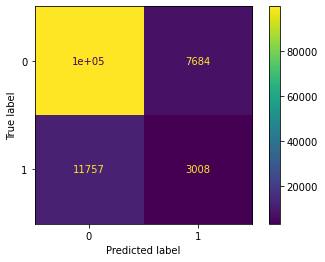

In [243]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf,X_test,y_test)  
plt.show()

In [244]:
from sklearn.metrics import f1_score
precision_score_dtc = precision_score(y_test,y_test_pred_dtc)
recall_score_dtc = recall_score(y_test,y_test_pred_dtc)
f1_score_dtc = f1_score(y_test,y_test_pred_dtc)



print(precision_score_dtc)
print(recall_score_dtc)
print(f1_score_dtc)

0.28133183688739244
0.20372502539790044
0.23632006913619044


In [245]:
# Get the roc_auc score for train and test dataset
train_auc_dtc = roc_auc_score(y_train,y_train_pred_proba_dtc)
test_auc_dtc = roc_auc_score(y_test,y_test_pred_proba_dtc)

print(train_auc_dtc)
print(test_auc_dtc)

0.9854129055411791
0.6257986580144334


Descision tree classifier model with hyperparameter tuning

In [246]:
parameter_dict ={
    'max_features' : [3,5,7],
    'max_depth': [5, 10,30],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [247]:
#Import decision tree classifier model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Create a DTC Classifier
dtc_clf = DecisionTreeClassifier()
dtc_clf_cv = GridSearchCV(dtc_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
dtc_clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=5; total time=   0.2s
[CV] END ........................max_depth=5, max_features=5; total time=   0.2s
[CV] END ........................max_depth=5, max_features=5; total time=   0.2s
[CV] END ........................max_depth=5, max_features=5; total time=   0.3s
[CV] END ........................max_depth=5, max_features=5; total time=   0.3s
[CV] END ........................max_depth=5, max_features=7; total time=   0.3s
[CV] END ........................max_depth=5, max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 30], 'max_features': [3, 5, 7]},
             verbose=2)

In [248]:
# Decision tree best paramaters
dtc_clf_optimum = dtc_clf_cv.best_estimator_
dtc_clf_optimum

DecisionTreeClassifier(max_depth=5, max_features=3)

In [249]:
#model score train set

dtc_clf_optimum.score(X_train,y_train)

0.8776748192635291

In [250]:
#model score test set

dtc_clf_optimum.score(X_test,y_test)

0.8793651571987806

In [251]:
y_train_pred_dtc_cv = dtc_clf_optimum.predict(X_train)
y_train_pred_proba_dtc_cv = dtc_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_dtc_cv = dtc_clf_optimum.predict(X_test)
y_test_pred_proba_dtc_cv = dtc_clf_optimum.predict_proba(X_test)[:,1]

In [252]:
from sklearn.metrics import classification_report

In [253]:
print(classification_report(y_test, y_test_pred_dtc_cv))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    107596
           1       0.53      0.00      0.00     14765

    accuracy                           0.88    122361
   macro avg       0.70      0.50      0.47    122361
weighted avg       0.84      0.88      0.82    122361



In [254]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_dtc_cv = accuracy_score(y_train,y_train_pred_dtc_cv)
test_accuracy_dtc_cv = accuracy_score(y_test,y_test_pred_dtc_cv)

print("The accuracy on train dataset is", train_accuracy_dtc_cv)
print("The accuracy on test dataset is", test_accuracy_dtc_cv)




The accuracy on train dataset is 0.8776748192635291
The accuracy on test dataset is 0.8793651571987806


In [255]:
# Get the confusion matrices for train and test
train_cm_dtc_cv = confusion_matrix(y_train,y_train_pred_dtc_cv)
test_cm_dtc_cv = confusion_matrix(y_test,y_test_pred_dtc_cv)

print(train_cm_dtc_cv)

print(test_cm_dtc_cv)

[[217969     69]
 [ 30320     70]]
[[107563     33]
 [ 14728     37]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


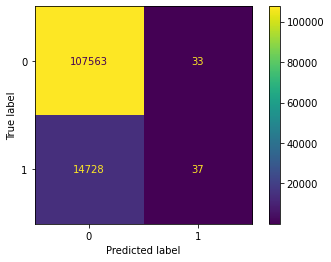

In [256]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf_cv,X_test,y_test)  
plt.show()

In [257]:
from sklearn.metrics import f1_score
precision_score_dtc_cv = precision_score(y_test,y_test_pred_dtc_cv)
recall_score_dtc_cv = recall_score(y_test,y_test_pred_dtc_cv)
f1_score_dtc_cv = f1_score(y_test,y_test_pred_dtc_cv)



print(precision_score_dtc_cv)
print(recall_score_dtc_cv)
print(f1_score_dtc_cv)

0.5285714285714286
0.0025059261767693872
0.004988203572632289


In [258]:
# Get the roc_auc score for train and test dataset
train_auc_dtc_cv = roc_auc_score(y_train,y_train_pred_proba_dtc_cv)
test_auc_dtc_cv = roc_auc_score(y_test,y_test_pred_proba_dtc_cv)

print(train_auc_dtc)
print(test_auc_dtc)

0.9854129055411791
0.6257986580144334


Random forest classifier

In [259]:
#Import random forest classifier model

from sklearn.ensemble import RandomForestClassifier

#Create a svm Classifier
rfc_clf = RandomForestClassifier(max_features ="sqrt" )

#Train the model using the training sets
rfc_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_features='sqrt')

In [260]:
#model score train set

rfc_clf.score(X_train,y_train)

0.9551660843383194

In [261]:
#model score test set

rfc_clf.score(X_test,y_test)

0.8388130204885543

In [262]:
y_train_pred_rfc = rfc_clf.predict(X_train)
y_train_pred_proba_rfc = rfc_clf.predict_proba(X_train)[:,1]


y_test_pred_rfc = rfc_clf.predict(X_test)
y_test_pred_proba_rfc = rfc_clf.predict_proba(X_test)[:,1]

In [263]:
from sklearn.metrics import classification_report

In [264]:
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    107596
           1       0.28      0.22      0.25     14765

    accuracy                           0.84    122361
   macro avg       0.59      0.57      0.58    122361
weighted avg       0.82      0.84      0.83    122361



In [265]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_rfc = accuracy_score(y_train,y_train_pred_rfc)
test_accuracy_rfc = accuracy_score(y_test,y_test_pred_rfc)

print("The accuracy on train dataset is", train_accuracy_rfc)
print("The accuracy on test dataset is", test_accuracy_rfc)




The accuracy on train dataset is 0.9551660843383194
The accuracy on test dataset is 0.8388130204885543


In [266]:
# Get the confusion matrices for train and test
train_cm_rfc = confusion_matrix(y_train,y_train_pred_rfc)
test_cm_rfc = confusion_matrix(y_test,y_test_pred_rfc)

print(train_cm_rfc)

print(test_cm_rfc)

[[216463   1575]
 [  9563  20827]]
[[99389  8207]
 [11516  3249]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


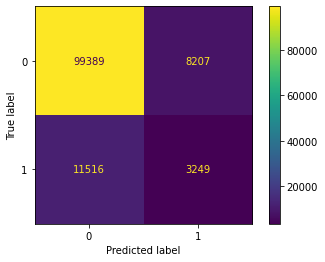

In [267]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_clf,X_test,y_test)  
plt.show()

In [268]:
from sklearn.metrics import f1_score
precision_score_rfc = precision_score(y_test,y_test_pred_rfc)
recall_score_rfc = recall_score(y_test,y_test_pred_rfc)
f1_score_rfc = f1_score(y_test,y_test_pred_rfc)



print(precision_score_rfc)
print(recall_score_rfc)
print(f1_score_rfc)

0.283606843575419
0.2200474094141551
0.24781663552114716


In [269]:
# Get the roc_auc score for train and test dataset
train_auc_rfc = roc_auc_score(y_train,y_train_pred_proba_rfc)
test_auc_rfc = roc_auc_score(y_test,y_test_pred_proba_rfc)

print(train_auc_rfc)
print(test_auc_rfc)

0.9780155089539276
0.751457734742574


Random forest classifier model with hyperparameter tuning

In [270]:
parameter_dict ={
    'n_estimators' : [20, 200],
    'max_features' : ['sqrt'],
    #'max_depth': [3, 5, 10, 30],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [271]:
#Import decision tree classifier model

#from sklearn.tree import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
#Create a DTC Classifier
rfc_clf = RandomForestClassifier()
rfc_clf_cv = GridSearchCV(rfc_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
rfc_clf_cv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................max_features=sqrt, n_estimators=20; total time=   8.5s
[CV] END .................max_features=sqrt, n_estimators=20; total time=   8.2s
[CV] END .................max_features=sqrt, n_estimators=20; total time=   9.3s
[CV] END .................max_features=sqrt, n_estimators=20; total time=   8.6s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  10.1s
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.5min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.4min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.4min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.5min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.5min


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt'], 'n_estimators': [20, 200]},
             verbose=2)

In [272]:
# Decision tree best paramaters
rfc_clf_optimum = rfc_clf_cv.best_estimator_
rfc_clf_optimum

RandomForestClassifier(max_features='sqrt', n_estimators=20)

In [273]:
#model score train set

rfc_clf_optimum.score(X_train,y_train)

0.9495990790088074

In [274]:
#model score test set

rfc_clf_optimum.score(X_test,y_test)

0.8400797639770842

In [275]:
y_train_pred_rfc_cv = rfc_clf_optimum.predict(X_train)
y_train_pred_proba_rfc_cv = rfc_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_rfc_cv = rfc_clf_optimum.predict(X_test)
y_test_pred_proba_rfc_cv = rfc_clf_optimum.predict_proba(X_test)[:,1]

In [276]:
from sklearn.metrics import classification_report

In [277]:
print(classification_report(y_test, y_test_pred_rfc_cv))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91    107596
           1       0.28      0.21      0.24     14765

    accuracy                           0.84    122361
   macro avg       0.59      0.57      0.58    122361
weighted avg       0.82      0.84      0.83    122361



In [278]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_rfc_cv = accuracy_score(y_train,y_train_pred_rfc_cv)
test_accuracy_rfc_cv = accuracy_score(y_test,y_test_pred_rfc_cv)

print("The accuracy on train dataset is", train_accuracy_rfc_cv)
print("The accuracy on test dataset is", test_accuracy_rfc_cv)




The accuracy on train dataset is 0.9495990790088074
The accuracy on test dataset is 0.8400797639770842


In [279]:
# Get the confusion matrices for train and test
train_cm_rfc_cv = confusion_matrix(y_train,y_train_pred_rfc_cv)
test_cm_rfc_cv = confusion_matrix(y_test,y_test_pred_rfc_cv)

print(train_cm_rfc_cv)

print(test_cm_rfc_cv)

[[215954   2084]
 [ 10437  19953]]
[[99659  7937]
 [11631  3134]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


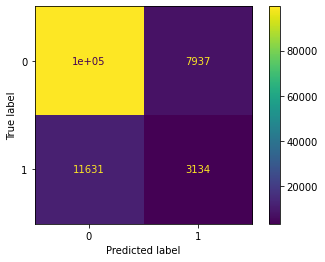

In [280]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_clf_cv,X_test,y_test)  
plt.show()

In [281]:
from sklearn.metrics import f1_score
precision_score_rfc_cv = precision_score(y_test,y_test_pred_rfc_cv)
recall_score_rfc_cv = recall_score(y_test,y_test_pred_rfc_cv)
f1_score_rfc_cv = f1_score(y_test,y_test_pred_rfc_cv)



print(precision_score_rfc_cv)
print(recall_score_rfc_cv)
print(f1_score_rfc_cv)

0.2830819257519646
0.21225871994581783
0.24260721473912372


In [282]:
# Get the roc_auc score for train and test dataset
train_auc_rfc_cv = roc_auc_score(y_train,y_train_pred_proba_rfc_cv)
test_auc_rfc_cv = roc_auc_score(y_test,y_test_pred_proba_rfc_cv)

print(train_auc_dtc)
print(test_auc_dtc)

0.9854129055411791
0.6257986580144334


XGB classifier

In [283]:
#Import XGB classifier model

import xgboost as xgb

#Create a svm Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic")

#Train the model using the training sets
xgb_clf.fit(X_train, y_train.values.ravel())

XGBClassifier()

In [284]:
#model score train set

xgb_clf.score(X_train,y_train)

0.8776707939523725

In [285]:
#model score test set

xgb_clf.score(X_test,y_test)

0.879332467044238

In [286]:
y_train_pred_xgb = xgb_clf.predict(X_train)
y_train_pred_proba_xgb = xgb_clf.predict_proba(X_train)[:,1]


y_test_pred_xgb = xgb_clf.predict(X_test)
y_test_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

In [287]:
from sklearn.metrics import classification_report

In [288]:
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    107596
           1       0.00      0.00      0.00     14765

    accuracy                           0.88    122361
   macro avg       0.44      0.50      0.47    122361
weighted avg       0.77      0.88      0.82    122361



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [289]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_xgb = accuracy_score(y_train,y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test,y_test_pred_xgb)

print("The accuracy on train dataset is", train_accuracy_xgb)
print("The accuracy on test dataset is", test_accuracy_xgb)




The accuracy on train dataset is 0.8776707939523725
The accuracy on test dataset is 0.879332467044238


In [290]:
# Get the confusion matrices for train and test
train_cm_xgb = confusion_matrix(y_train,y_train_pred_xgb)
test_cm_xgb = confusion_matrix(y_test,y_test_pred_xgb)

print(train_cm_xgb)

print(test_cm_xgb)

[[218038      0]
 [ 30390      0]]
[[107596      0]
 [ 14765      0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


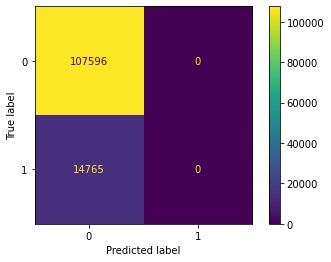

In [291]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf,X_test,y_test)  
plt.show()

In [292]:
from sklearn.metrics import f1_score
precision_score_xgb = precision_score(y_test,y_test_pred_xgb)
recall_score_xgb = recall_score(y_test,y_test_pred_xgb)
f1_score_xgb = f1_score(y_test,y_test_pred_xgb)



print(precision_score_xgb)
print(recall_score_xgb)
print(f1_score_xgb)

0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
# Get the roc_auc score for train and test dataset
train_auc_xgb = roc_auc_score(y_train,y_train_pred_proba_xgb)
test_auc_xgb = roc_auc_score(y_test,y_test_pred_proba_xgb)

print(train_auc_xgb)
print(test_auc_xgb)

0.8394126862170533
0.8384558682076046


XGBoost classifier model with hyperparameter tuning

In [294]:
parameter_dict ={
    'n_estimators' : [20, 200],
    'max_depth': [3, 10],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [295]:
#using grid search perform hyperparameter tuning on XGB

from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBClassifier(objective="binary:logistic")
xgb_clf_cv = GridSearchCV(xgb_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
xgb_clf_cv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=  13.5s
[CV] END ......................max_depth=3, n_estimators=100; total time=  13.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=  14.6s
[CV] END ......................max_depth=3, n_estimators=100; total time=  12.9s
[CV] END ......................max_depth=3, n_estimators=100; total time=  12.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=  26.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=  24.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=  26.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=  25.6s
[CV] END ......................max_depth=3, n_estimators=200; total time=  26.2s
[CV] END ......................max_depth=7, n_estimators=100; total time=  28.5s
[CV] END ......................max_depth=7, n_est

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 7, 10], 'n_estimators': [100, 200]},
             verbose=2)

In [296]:
# Decision tree best paramaters
xgb_clf_optimum = xgb_clf_cv.best_estimator_
xgb_clf_optimum

XGBClassifier(max_depth=7)

In [297]:
#model score train set

xgb_clf_optimum.score(X_train,y_train)

0.8780773503791843

In [298]:
#model score test set

xgb_clf_optimum.score(X_test,y_test)

0.8794632276624088

In [299]:
y_train_pred_xgb_cv = xgb_clf_optimum.predict(X_train)
y_train_pred_proba_xgb_cv = xgb_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_xgb_cv = xgb_clf_optimum.predict(X_test)
y_test_pred_proba_xgb_cv = xgb_clf_optimum.predict_proba(X_test)[:,1]

In [300]:
from sklearn.metrics import classification_report

In [301]:
print(classification_report(y_test, y_test_pred_xgb_cv))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    107596
           1       0.61      0.00      0.01     14765

    accuracy                           0.88    122361
   macro avg       0.75      0.50      0.47    122361
weighted avg       0.85      0.88      0.82    122361



In [302]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_xgb_cv = accuracy_score(y_train,y_train_pred_xgb_cv)
test_accuracy_xgb_cv = accuracy_score(y_test,y_test_pred_xgb_cv)

print("The accuracy on train dataset is", train_accuracy_xgb_cv)
print("The accuracy on test dataset is", test_accuracy_xgb_cv)




The accuracy on train dataset is 0.8780773503791843
The accuracy on test dataset is 0.8794632276624088


In [303]:
# Get the confusion matrices for train and test
train_cm_xgb_cv = confusion_matrix(y_train,y_train_pred_xgb_cv)
test_cm_xgb_cv = confusion_matrix(y_test,y_test_pred_xgb_cv)

print(train_cm_xgb_cv)

print(test_cm_xgb_cv)

[[218012     26]
 [ 30263    127]]
[[107569     27]
 [ 14722     43]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


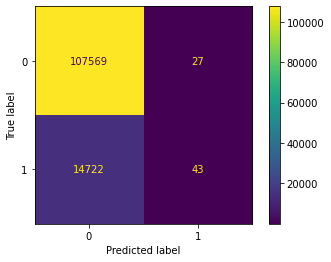

In [304]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf_optimum,X_test,y_test)  
plt.show()

In [305]:
from sklearn.metrics import f1_score
precision_score_xgb_cv = precision_score(y_test,y_test_pred_xgb_cv)
recall_score_xgb_cv = recall_score(y_test,y_test_pred_xgb_cv)
f1_score_xgb_cv = f1_score(y_test,y_test_pred_xgb_cv)



print(precision_score_xgb_cv)
print(recall_score_xgb_cv)
print(f1_score_xgb_cv)

0.6142857142857143
0.0029122925838130716
0.005797101449275362


In [306]:
# Get the roc_auc score for train and test dataset
train_auc_xgb_cv = roc_auc_score(y_train,y_train_pred_proba_xgb_cv)
test_auc_xgb_cv = roc_auc_score(y_test,y_test_pred_proba_xgb_cv)

print(train_auc_xgb)
print(test_auc_xgb)

0.8394126862170533
0.8384558682076046


dataframe of scores

In [307]:
model_name= ['logistic_regression_model','Descision_tree(baseline)','Decsion tree cv','random forest','random forest cv','XGB model','XGB model CV']
accuracy_score_train_set = [train_accuracy_log,train_accuracy_dtc,train_accuracy_dtc_cv,train_accuracy_rfc,train_accuracy_rfc_cv,train_accuracy_xgb,train_accuracy_xgb_cv]
accuracy_score_test_set= [test_accuracy_log,test_accuracy_dtc,test_accuracy_dtc_cv,test_accuracy_rfc,test_accuracy_rfc_cv,test_accuracy_xgb,test_accuracy_xgb_cv]
precision_score=[precision_score_logr,precision_score_dtc,precision_score_dtc_cv,precision_score_rfc,precision_score_rfc_cv,precision_score_xgb,precision_score_xgb_cv]
recall_score= [recall_score_logr,recall_score_dtc,recall_score_dtc_cv,recall_score_rfc,recall_score_rfc_cv,recall_score_xgb,recall_score_xgb_cv]
f1_score=[f1_score_logr,f1_score_dtc,f1_score_dtc_cv,f1_score_rfc,f1_score_rfc_cv,f1_score_xgb,f1_score_xgb_cv]
auc_score_train_set=[train_auc_log,train_auc_dtc,train_auc_dtc_cv,train_auc_rfc,train_auc_rfc_cv,train_auc_xgb,train_auc_xgb_cv]
auc_score_test_set=[test_auc_log,test_auc_dtc,test_auc_dtc_cv,test_auc_rfc,test_auc_rfc_cv,test_auc_xgb,test_auc_xgb_cv]






In [308]:
dict = {'model_name': model_name,
        'accuracy_score_train_set': accuracy_score_train_set,
        'accuracy_score_test_set': accuracy_score_test_set,
        'precision_score': precision_score,
        'recall_score':recall_score,
        'f1_score':f1_score,
        'auc_score_train_set':auc_score_train_set,
        'auc_score_test_set':auc_score_test_set
        } 

In [309]:
scores_df_imbalanced = pd.DataFrame(dict)

In [310]:
scores_df_imbalanced

,model_name,accuracy_score_train_set,accuracy_score_test_set,precision_score,recall_score,f1_score,auc_score_train_set,auc_score_test_set
0,logistic_regression_model,0.877671,0.879332,0.000000,0.000000,0.000000,0.836356,0.836695
1,Descision_tree(baseline),0.955283,0.841118,0.281332,0.203725,0.236320,0.985413,0.625799
2,Decsion tree cv,0.877675,0.879365,0.528571,0.002506,0.004988,0.812092,0.811678
3,random forest,0.955166,0.838813,0.283607,0.220047,0.247817,0.978016,0.751458
4,random forest cv,0.949599,0.840080,0.283082,0.212259,0.242607,0.975722,0.722385
5,XGB model,0.877671,0.879332,0.000000,0.000000,0.000000,0.839413,0.838456
6,XGB model CV,0.878077,0.879463,0.614286,0.002912,0.005797,0.847546,0.838201


#Using Oversampling : SMOTE

It can be seen that model is predicting incorrectly due to imbalanced data

In [311]:
from imblearn.over_sampling import SMOTE

In [312]:
# seperating dependent and independent features

y=df1[dependent_features]

X=df1[independent_features]

In [313]:
y.value_counts()

Response
0           325634
1            45155
dtype: int64

In [314]:
sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X,y)

In [315]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 

After OverSampling, the shape of X: (651268, 14)
After OverSampling, the shape of y: (651268, 1) 



In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [317]:
#shape of training data

print(X_train.shape,y_train.shape)

(436349, 14) (436349, 1)


In [318]:
#shape of testing data

print(X_test.shape,y_test.shape)

(214919, 14) (214919, 1)


In [319]:
y_test.value_counts()

Response
0           107482
1           107437
dtype: int64

Standardising features

In [320]:
from sklearn.preprocessing import MinMaxScaler
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Logistic regression

In [321]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [322]:
#model score train set

log_clf.score(X_train,y_train)

0.8501864333366181

In [323]:
#model score test set

log_clf.score(X_test,y_test)

0.8508461327290747

In [324]:
y_train_pred_log = log_clf.predict(X_train)
y_train_pred_proba_log = log_clf.predict_proba(X_train)[:,1]


y_test_pred_log = log_clf.predict(X_test)
y_test_pred_proba_log = log_clf.predict_proba(X_test)[:,1]

In [325]:
from sklearn.metrics import classification_report

In [326]:
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85    107482
           1       0.84      0.86      0.85    107437

    accuracy                           0.85    214919
   macro avg       0.85      0.85      0.85    214919
weighted avg       0.85      0.85      0.85    214919



In [327]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_log = accuracy_score(y_train,y_train_pred_log)
test_accuracy_log = accuracy_score(y_test,y_test_pred_log)

print("The accuracy on train dataset is", train_accuracy_log)
print("The accuracy on test dataset is", test_accuracy_log)




The accuracy on train dataset is 0.8501864333366181
The accuracy on test dataset is 0.8508461327290747


In [328]:
# Get the confusion matrices for train and test
train_cm_log = confusion_matrix(y_train,y_train_pred_log)
test_cm_log = confusion_matrix(y_test,y_test_pred_log)

print(train_cm_log)

print(test_cm_log)

[[183207  34945]
 [ 30426 187771]]
[[90217 17265]
 [14791 92646]]


In [329]:
from sklearn.metrics import f1_score
precision_score_logr = precision_score(y_test,y_test_pred_log)
recall_score_logr = recall_score(y_test,y_test_pred_log)
f1_score_logr = f1_score(y_test,y_test_pred_log)



print(precision_score_logr)
print(recall_score_logr)
print(f1_score_logr)

0.8429183612195321
0.8623286204938708
0.8525130205937023


In [330]:
# Get the roc_auc score for train and test dataset
train_auc_log = roc_auc_score(y_train,y_train_pred_proba_log)
test_auc_log = roc_auc_score(y_test,y_test_pred_proba_log)

print(train_auc_log)
print(test_auc_log)

0.9444510619510572
0.9453238825925705


Decision tree classifier

In [331]:
#Import svm model

from sklearn.tree import DecisionTreeClassifier

#Create a svm Classifier
dtc_clf = DecisionTreeClassifier(max_features ="sqrt" ) # Linear Kernel

#Train the model using the training sets
dtc_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [332]:
#model score train set

dtc_clf.score(X_train,y_train)

0.9417095031729189

In [333]:
#model score test set

dtc_clf.score(X_test,y_test)

0.8734732620196446

In [334]:
y_train_pred_dtc = dtc_clf.predict(X_train)
y_train_pred_proba_dtc = dtc_clf.predict_proba(X_train)[:,1]


y_test_pred_dtc = dtc_clf.predict(X_test)
y_test_pred_proba_dtc = dtc_clf.predict_proba(X_test)[:,1]

In [335]:
from sklearn.metrics import classification_report

In [336]:
print(classification_report(y_test, y_test_pred_dtc))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87    107482
           1       0.85      0.91      0.88    107437

    accuracy                           0.87    214919
   macro avg       0.88      0.87      0.87    214919
weighted avg       0.88      0.87      0.87    214919



In [337]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_dtc = accuracy_score(y_train,y_train_pred_dtc)
test_accuracy_dtc = accuracy_score(y_test,y_test_pred_dtc)

print("The accuracy on train dataset is", train_accuracy_dtc)
print("The accuracy on test dataset is", test_accuracy_dtc)




The accuracy on train dataset is 0.9417095031729189
The accuracy on test dataset is 0.8734732620196446


In [338]:
# Get the confusion matrices for train and test
train_cm_dtc = confusion_matrix(y_train,y_train_pred_dtc)
test_cm_dtc = confusion_matrix(y_test,y_test_pred_dtc)

print(train_cm_dtc)

print(test_cm_dtc)

[[198979  19173]
 [  6262 211935]]
[[89816 17666]
 [ 9527 97910]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


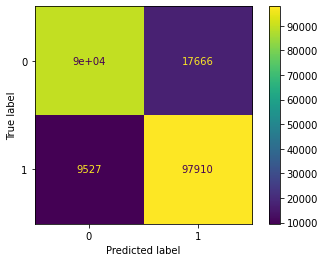

In [339]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf,X_test,y_test)  
plt.show()

In [340]:
from sklearn.metrics import f1_score
precision_score_dtc = precision_score(y_test,y_test_pred_dtc)
recall_score_dtc = recall_score(y_test,y_test_pred_dtc)
f1_score_dtc = f1_score(y_test,y_test_pred_dtc)



print(precision_score_dtc)
print(recall_score_dtc)
print(f1_score_dtc)

0.8471481968574791
0.9113247763805765
0.8780654042589444


In [341]:
# Get the roc_auc score for train and test dataset
train_auc_dtc = roc_auc_score(y_train,y_train_pred_proba_dtc)
test_auc_dtc = roc_auc_score(y_test,y_test_pred_proba_dtc)

print(train_auc_dtc)
print(test_auc_dtc)

0.9901381615225555
0.9028309118749506


Descision tree classifier model with hyperparameter tuning

In [342]:
parameter_dict ={
    'max_features' : [3,5,7],
    'max_depth': [5, 10,30],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [343]:
#Import decision tree classifier model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Create a DTC Classifier
dtc_clf = DecisionTreeClassifier()
dtc_clf_cv = GridSearchCV(dtc_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
dtc_clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................max_depth=5, max_features=3; total time=   0.4s
[CV] END ........................max_depth=5, max_features=3; total time=   0.4s
[CV] END ........................max_depth=5, max_features=3; total time=   0.3s
[CV] END ........................max_depth=5, max_features=3; total time=   0.3s
[CV] END ........................max_depth=5, max_features=3; total time=   0.4s
[CV] END ........................max_depth=5, max_features=5; total time=   0.6s
[CV] END ........................max_depth=5, max_features=5; total time=   0.4s
[CV] END ........................max_depth=5, max_features=5; total time=   0.5s
[CV] END ........................max_depth=5, max_features=5; total time=   0.4s
[CV] END ........................max_depth=5, max_features=5; total time=   0.5s
[CV] END ........................max_depth=5, max_features=7; total time=   0.6s
[CV] END ........................max_depth=5, max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 30], 'max_features': [3, 5, 7]},
             verbose=2)

In [344]:
# Decision tree best paramaters
dtc_clf_optimum = dtc_clf_cv.best_estimator_
dtc_clf_optimum

DecisionTreeClassifier(max_depth=30, max_features=3)

In [345]:
#model score train set

dtc_clf_optimum.score(X_train,y_train)

0.8910665545240163

In [346]:
#model score test set

dtc_clf_optimum.score(X_test,y_test)

0.8633717819271447

In [347]:
y_train_pred_dtc_cv = dtc_clf_optimum.predict(X_train)
y_train_pred_proba_dtc_cv = dtc_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_dtc_cv = dtc_clf_optimum.predict(X_test)
y_test_pred_proba_dtc_cv = dtc_clf_optimum.predict_proba(X_test)[:,1]

In [348]:
from sklearn.metrics import classification_report

In [349]:
print(classification_report(y_test, y_test_pred_dtc_cv))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86    107482
           1       0.83      0.91      0.87    107437

    accuracy                           0.86    214919
   macro avg       0.87      0.86      0.86    214919
weighted avg       0.87      0.86      0.86    214919



In [350]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_dtc_cv = accuracy_score(y_train,y_train_pred_dtc_cv)
test_accuracy_dtc_cv = accuracy_score(y_test,y_test_pred_dtc_cv)

print("The accuracy on train dataset is", train_accuracy_dtc_cv)
print("The accuracy on test dataset is", test_accuracy_dtc_cv)




The accuracy on train dataset is 0.8910665545240163
The accuracy on test dataset is 0.8633717819271447


In [351]:
# Get the confusion matrices for train and test
train_cm_dtc_cv = confusion_matrix(y_train,y_train_pred_dtc_cv)
test_cm_dtc_cv = confusion_matrix(y_test,y_test_pred_dtc_cv)

print(train_cm_dtc_cv)

print(test_cm_dtc_cv)

[[184499  33653]
 [ 13880 204317]]
[[87558 19924]
 [ 9440 97997]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


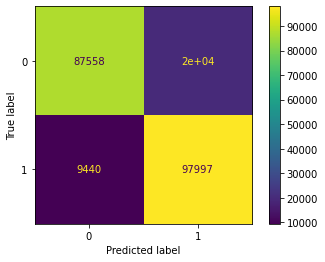

In [352]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf_cv,X_test,y_test)  
plt.show()

In [353]:
from sklearn.metrics import f1_score
precision_score_dtc_cv = precision_score(y_test,y_test_pred_dtc_cv)
recall_score_dtc_cv = recall_score(y_test,y_test_pred_dtc_cv)
f1_score_dtc_cv = f1_score(y_test,y_test_pred_dtc_cv)



print(precision_score_dtc_cv)
print(recall_score_dtc_cv)
print(f1_score_dtc_cv)

0.831039424699587
0.912134553273081
0.8697006540704124


In [354]:
# Get the roc_auc score for train and test dataset
train_auc_dtc_cv = roc_auc_score(y_train,y_train_pred_proba_dtc_cv)
test_auc_dtc_cv = roc_auc_score(y_test,y_test_pred_proba_dtc_cv)

print(train_auc_dtc)
print(test_auc_dtc)

0.9901381615225555
0.9028309118749506


Random forest classifier

In [355]:
#Import random forest classifier model

from sklearn.ensemble import RandomForestClassifier

#Create a svm Classifier
rfc_clf = RandomForestClassifier(max_features ="sqrt" )

#Train the model using the training sets
rfc_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_features='sqrt')

In [356]:
#model score train set

rfc_clf.score(X_train,y_train)

0.9416636683022076

In [357]:
#model score test set

rfc_clf.score(X_test,y_test)

0.8731894341589157

In [358]:
y_train_pred_rfc = rfc_clf.predict(X_train)
y_train_pred_proba_rfc = rfc_clf.predict_proba(X_train)[:,1]


y_test_pred_rfc = rfc_clf.predict(X_test)
y_test_pred_proba_rfc = rfc_clf.predict_proba(X_test)[:,1]

In [359]:
from sklearn.metrics import classification_report

In [360]:
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87    107482
           1       0.84      0.92      0.88    107437

    accuracy                           0.87    214919
   macro avg       0.88      0.87      0.87    214919
weighted avg       0.88      0.87      0.87    214919



In [361]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_rfc = accuracy_score(y_train,y_train_pred_rfc)
test_accuracy_rfc = accuracy_score(y_test,y_test_pred_rfc)

print("The accuracy on train dataset is", train_accuracy_rfc)
print("The accuracy on test dataset is", test_accuracy_rfc)




The accuracy on train dataset is 0.9416636683022076
The accuracy on test dataset is 0.8731894341589157


In [362]:
# Get the confusion matrices for train and test
train_cm_rfc = confusion_matrix(y_train,y_train_pred_rfc)
test_cm_rfc = confusion_matrix(y_test,y_test_pred_rfc)

print(train_cm_rfc)

print(test_cm_rfc)

[[196968  21184]
 [  4271 213926]]
[[89109 18373]
 [ 8881 98556]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


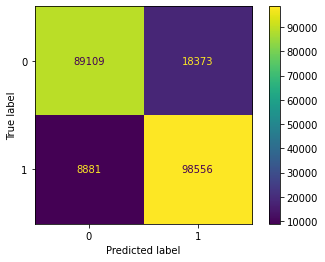

In [363]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_clf,X_test,y_test)  
plt.show()

In [364]:
from sklearn.metrics import f1_score
precision_score_rfc = precision_score(y_test,y_test_pred_rfc)
recall_score_rfc = recall_score(y_test,y_test_pred_rfc)
f1_score_rfc = f1_score(y_test,y_test_pred_rfc)



print(precision_score_rfc)
print(recall_score_rfc)
print(f1_score_rfc)

0.8428704598517048
0.9173376025019314
0.8785288323542783


In [365]:
# Get the roc_auc score for train and test dataset
train_auc_rfc = roc_auc_score(y_train,y_train_pred_proba_rfc)
test_auc_rfc = roc_auc_score(y_test,y_test_pred_proba_rfc)

print(train_auc_rfc)
print(test_auc_rfc)

0.9874004926562867
0.946164090459067


Random forest classifier model with hyperparameter tuning

In [366]:
parameter_dict ={
    'n_estimators' : [20, 200],
    'max_features' : ['sqrt'],
    #'max_depth': [3, 5, 10, 30],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [367]:
#Import decision tree classifier model

#from sklearn.tree import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
#Create a DTC Classifier
rfc_clf = RandomForestClassifier()
rfc_clf_cv = GridSearchCV(rfc_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
rfc_clf_cv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................max_features=sqrt, n_estimators=20; total time=  13.8s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  12.8s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  15.2s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  14.0s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  13.8s
[CV] END ................max_features=sqrt, n_estimators=200; total time= 2.4min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 2.3min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 2.5min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 2.3min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 2.3min


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt'], 'n_estimators': [20, 200]},
             verbose=2)

In [368]:
# Decision tree best paramaters
rfc_clf_optimum = rfc_clf_cv.best_estimator_
rfc_clf_optimum

RandomForestClassifier(max_features='sqrt', n_estimators=20)

In [369]:
#model score train set

rfc_clf_optimum.score(X_train,y_train)

0.9385056457101999

In [370]:
#model score test set

rfc_clf_optimum.score(X_test,y_test)

0.8740781410670997

In [371]:
y_train_pred_rfc_cv = rfc_clf_optimum.predict(X_train)
y_train_pred_proba_rfc_cv = rfc_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_rfc_cv = rfc_clf_optimum.predict(X_test)
y_test_pred_proba_rfc_cv = rfc_clf_optimum.predict_proba(X_test)[:,1]

In [372]:
from sklearn.metrics import classification_report

In [373]:
print(classification_report(y_test, y_test_pred_rfc_cv))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87    107482
           1       0.84      0.92      0.88    107437

    accuracy                           0.87    214919
   macro avg       0.88      0.87      0.87    214919
weighted avg       0.88      0.87      0.87    214919



In [374]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_rfc_cv = accuracy_score(y_train,y_train_pred_rfc_cv)
test_accuracy_rfc_cv = accuracy_score(y_test,y_test_pred_rfc_cv)

print("The accuracy on train dataset is", train_accuracy_rfc_cv)
print("The accuracy on test dataset is", test_accuracy_rfc_cv)




The accuracy on train dataset is 0.9385056457101999
The accuracy on test dataset is 0.8740781410670997


In [375]:
# Get the confusion matrices for train and test
train_cm_rfc_cv = confusion_matrix(y_train,y_train_pred_rfc_cv)
test_cm_rfc_cv = confusion_matrix(y_test,y_test_pred_rfc_cv)

print(train_cm_rfc_cv)

print(test_cm_rfc_cv)

[[196650  21502]
 [  5331 212866]]
[[89388 18094]
 [ 8969 98468]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


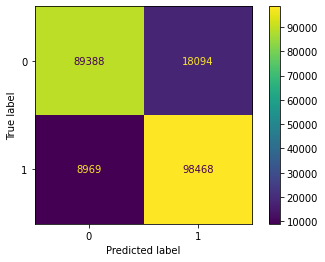

In [376]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_clf_cv,X_test,y_test)  
plt.show()

In [377]:
from sklearn.metrics import f1_score
precision_score_rfc_cv = precision_score(y_test,y_test_pred_rfc_cv)
recall_score_rfc_cv = recall_score(y_test,y_test_pred_rfc_cv)
f1_score_rfc_cv = f1_score(y_test,y_test_pred_rfc_cv)



print(precision_score_rfc_cv)
print(recall_score_rfc_cv)
print(f1_score_rfc_cv)

0.8447693073214255
0.9165185178290534
0.8791824963504301


In [378]:
# Get the roc_auc score for train and test dataset
train_auc_rfc_cv = roc_auc_score(y_train,y_train_pred_proba_rfc_cv)
test_auc_rfc_cv = roc_auc_score(y_test,y_test_pred_proba_rfc_cv)

print(train_auc_dtc)
print(test_auc_dtc)

0.9901381615225555
0.9028309118749506


XGB classifier

In [379]:
#Import XGB classifier model

import xgboost as xgb

#Create a svm Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic")

#Train the model using the training sets
xgb_clf.fit(X_train, y_train.values.ravel())

XGBClassifier()

In [380]:
#model score train set

xgb_clf.score(X_train,y_train)

0.8520152446779986

In [381]:
#model score test set

xgb_clf.score(X_test,y_test)

0.8538519163033514

In [382]:
y_train_pred_xgb = xgb_clf.predict(X_train)
y_train_pred_proba_xgb = xgb_clf.predict_proba(X_train)[:,1]


y_test_pred_xgb = xgb_clf.predict(X_test)
y_test_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

In [383]:
from sklearn.metrics import classification_report

In [384]:
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84    107482
           1       0.82      0.91      0.86    107437

    accuracy                           0.85    214919
   macro avg       0.86      0.85      0.85    214919
weighted avg       0.86      0.85      0.85    214919



In [385]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_xgb = accuracy_score(y_train,y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test,y_test_pred_xgb)

print("The accuracy on train dataset is", train_accuracy_xgb)
print("The accuracy on test dataset is", test_accuracy_xgb)




The accuracy on train dataset is 0.8520152446779986
The accuracy on test dataset is 0.8538519163033514


In [386]:
# Get the confusion matrices for train and test
train_cm_xgb = confusion_matrix(y_train,y_train_pred_xgb)
test_cm_xgb = confusion_matrix(y_test,y_test_pred_xgb)

print(train_cm_xgb)

print(test_cm_xgb)

[[172813  45339]
 [ 19234 198963]]
[[85242 22240]
 [ 9170 98267]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


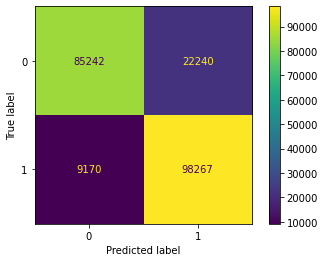

In [387]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf,X_test,y_test)  
plt.show()

In [388]:
from sklearn.metrics import f1_score
precision_score_xgb = precision_score(y_test,y_test_pred_xgb)
recall_score_xgb = recall_score(y_test,y_test_pred_xgb)
f1_score_xgb = f1_score(y_test,y_test_pred_xgb)



print(precision_score_xgb)
print(recall_score_xgb)
print(f1_score_xgb)

0.815446405602994
0.9146476539739569
0.8622029972273891


In [389]:
# Get the roc_auc score for train and test dataset
train_auc_xgb = roc_auc_score(y_train,y_train_pred_proba_xgb)
test_auc_xgb = roc_auc_score(y_test,y_test_pred_proba_xgb)

print(train_auc_xgb)
print(test_auc_xgb)

0.9453987448063635
0.9461982086674487


XGBoost classifier model with hyperparameter tuning

In [390]:
parameter_dict ={
    'n_estimators' : [20, 200],
    'max_depth': [3, 10],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [391]:
#using grid search perform hyperparameter tuning on XGB

from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBClassifier(objective="binary:logistic")
xgb_clf_cv = GridSearchCV(xgb_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
xgb_clf_cv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................max_depth=3, n_estimators=20; total time=   5.8s
[CV] END .......................max_depth=3, n_estimators=20; total time=   5.6s
[CV] END .......................max_depth=3, n_estimators=20; total time=   5.5s
[CV] END .......................max_depth=3, n_estimators=20; total time=   5.6s
[CV] END .......................max_depth=3, n_estimators=20; total time=   5.5s
[CV] END ......................max_depth=3, n_estimators=200; total time=  52.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=  53.7s
[CV] END ......................max_depth=3, n_estimators=200; total time=  58.3s
[CV] END ......................max_depth=3, n_estimators=200; total time=  56.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=  59.2s
[CV] END ......................max_depth=10, n_estimators=20; total time=  21.1s
[CV] END ......................max_depth=10, n_es

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 10], 'n_estimators': [20, 200]},
             verbose=2)

In [392]:
# Decision tree best paramaters
xgb_clf_optimum = xgb_clf_cv.best_estimator_
xgb_clf_optimum

XGBClassifier(max_depth=10, n_estimators=200)

In [393]:
#model score train set

xgb_clf_optimum.score(X_train,y_train)

0.8693064496538322

In [394]:
#model score test set

xgb_clf_optimum.score(X_test,y_test)

0.8627529441324406

In [395]:
y_train_pred_xgb_cv = xgb_clf_optimum.predict(X_train)
y_train_pred_proba_xgb_cv = xgb_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_xgb_cv = xgb_clf_optimum.predict(X_test)
y_test_pred_proba_xgb_cv = xgb_clf_optimum.predict_proba(X_test)[:,1]

In [396]:
from sklearn.metrics import classification_report

In [397]:
print(classification_report(y_test, y_test_pred_xgb_cv))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86    107482
           1       0.84      0.90      0.87    107437

    accuracy                           0.86    214919
   macro avg       0.86      0.86      0.86    214919
weighted avg       0.86      0.86      0.86    214919



In [398]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_xgb_cv = accuracy_score(y_train,y_train_pred_xgb_cv)
test_accuracy_xgb_cv = accuracy_score(y_test,y_test_pred_xgb_cv)

print("The accuracy on train dataset is", train_accuracy_xgb_cv)
print("The accuracy on test dataset is", test_accuracy_xgb_cv)




The accuracy on train dataset is 0.8693064496538322
The accuracy on test dataset is 0.8627529441324406


In [399]:
# Get the confusion matrices for train and test
train_cm_xgb_cv = confusion_matrix(y_train,y_train_pred_xgb_cv)
test_cm_xgb_cv = confusion_matrix(y_test,y_test_pred_xgb_cv)

print(train_cm_xgb_cv)

print(test_cm_xgb_cv)

[[182077  36075]
 [ 20953 197244]]
[[88804 18678]
 [10819 96618]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


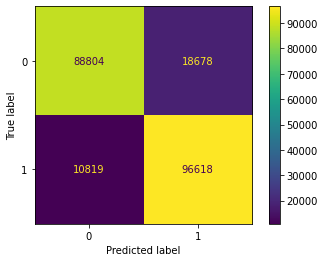

In [400]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf_optimum,X_test,y_test)  
plt.show()

In [401]:
from sklearn.metrics import f1_score
precision_score_xgb_cv = precision_score(y_test,y_test_pred_xgb_cv)
recall_score_xgb_cv = recall_score(y_test,y_test_pred_xgb_cv)
f1_score_xgb_cv = f1_score(y_test,y_test_pred_xgb_cv)



print(precision_score_xgb_cv)
print(recall_score_xgb_cv)
print(f1_score_xgb_cv)

0.8379995836802664
0.8992991241378668
0.8675678951928991


In [402]:
# Get the roc_auc score for train and test dataset
train_auc_xgb_cv = roc_auc_score(y_train,y_train_pred_proba_xgb_cv)
test_auc_xgb_cv = roc_auc_score(y_test,y_test_pred_proba_xgb_cv)

print(train_auc_xgb)
print(test_auc_xgb)

0.9453987448063635
0.9461982086674487


dataframe of scores

In [403]:
model_name= ['logistic_regression_model','Descision_tree(baseline)','Decsion tree cv','random forest','random forest cv','XGB model','XGB model CV']
accuracy_score_train_set = [train_accuracy_log,train_accuracy_dtc,train_accuracy_dtc_cv,train_accuracy_rfc,train_accuracy_rfc_cv,train_accuracy_xgb,train_accuracy_xgb_cv]
accuracy_score_test_set= [test_accuracy_log,test_accuracy_dtc,test_accuracy_dtc_cv,test_accuracy_rfc,test_accuracy_rfc_cv,test_accuracy_xgb,test_accuracy_xgb_cv]
precision_score=[precision_score_logr,precision_score_dtc,precision_score_dtc_cv,precision_score_rfc,precision_score_rfc_cv,precision_score_xgb,precision_score_xgb_cv]
recall_score= [recall_score_logr,recall_score_dtc,recall_score_dtc_cv,recall_score_rfc,recall_score_rfc_cv,recall_score_xgb,recall_score_xgb_cv]
f1_score=[f1_score_logr,f1_score_dtc,f1_score_dtc_cv,f1_score_rfc,f1_score_rfc_cv,f1_score_xgb,f1_score_xgb_cv]
auc_score_train_set=[train_auc_log,train_auc_dtc,train_auc_dtc_cv,train_auc_rfc,train_auc_rfc_cv,train_auc_xgb,train_auc_xgb_cv]
auc_score_test_set=[test_auc_log,test_auc_dtc,test_auc_dtc_cv,test_auc_rfc,test_auc_rfc_cv,test_auc_xgb,test_auc_xgb_cv]





In [404]:
dict = {'model_name': model_name,
        'accuracy_score_train_set': accuracy_score_train_set,
        'accuracy_score_test_set': accuracy_score_test_set,
        'precision_score': precision_score,
        'recall_score':recall_score,
        'f1_score':f1_score,
        'auc_score_train_set':auc_score_train_set,
        'auc_score_test_set':auc_score_test_set
        } 

In [405]:
scores_df_SMOTE = pd.DataFrame(dict)

In [406]:
scores_df_SMOTE

,model_name,accuracy_score_train_set,accuracy_score_test_set,precision_score,recall_score,f1_score,auc_score_train_set,auc_score_test_set
0,logistic_regression_model,0.850186,0.850846,0.842918,0.862329,0.852513,0.944451,0.945324
1,Descision_tree(baseline),0.941710,0.873473,0.847148,0.911325,0.878065,0.990138,0.902831
2,Decsion tree cv,0.891067,0.863372,0.831039,0.912135,0.869701,0.968655,0.930671
3,random forest,0.941664,0.873189,0.842870,0.917338,0.878529,0.987400,0.946164
4,random forest cv,0.938506,0.874078,0.844769,0.916519,0.879182,0.987143,0.940157
5,XGB model,0.852015,0.853852,0.815446,0.914648,0.862203,0.945399,0.946198
6,XGB model CV,0.869306,0.862753,0.838000,0.899299,0.867568,0.955025,0.951298


#Using Both Under and Over Sampling: SMOTE TOMEK

In [77]:
# seperating dependent and independent features

y=df1[dependent_features]

X=df1[independent_features]

In [78]:
from imblearn.combine import SMOTETomek

In [79]:
y.value_counts()

Response
0           325634
1            45155
dtype: int64

In [80]:
smt = SMOTETomek(random_state = 2) 
X, y = smt.fit_resample(X,y)

In [81]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape)) 

After OverSampling, the shape of X: (643558, 14)
After OverSampling, the shape of y: (643558, 1) 



In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [83]:
#shape of training data

print(X_train.shape,y_train.shape)

(431183, 14) (431183, 1)


In [84]:
#shape of testing data

print(X_test.shape,y_test.shape)

(212375, 14) (212375, 1)


In [85]:
y_test.value_counts()

Response
1           106343
0           106032
dtype: int64

Standardising features

In [86]:
from sklearn.preprocessing import MinMaxScaler
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [88]:
#model score train set

log_clf.score(X_train,y_train)

0.8521509428711244

In [89]:
#model score test set

log_clf.score(X_test,y_test)

0.8533254855797527

In [90]:
y_train_pred_log = log_clf.predict(X_train)
y_train_pred_proba_log = log_clf.predict_proba(X_train)[:,1]


y_test_pred_log = log_clf.predict(X_test)
y_test_pred_proba_log = log_clf.predict_proba(X_test)[:,1]

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85    106032
           1       0.84      0.87      0.86    106343

    accuracy                           0.85    212375
   macro avg       0.85      0.85      0.85    212375
weighted avg       0.85      0.85      0.85    212375



In [93]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_log = accuracy_score(y_train,y_train_pred_log)
test_accuracy_log = accuracy_score(y_test,y_test_pred_log)

print("The accuracy on train dataset is", train_accuracy_log)
print("The accuracy on test dataset is", test_accuracy_log)




The accuracy on train dataset is 0.8521509428711244
The accuracy on test dataset is 0.8533254855797527


In [94]:
# Get the confusion matrices for train and test
train_cm_log = confusion_matrix(y_train,y_train_pred_log)
test_cm_log = confusion_matrix(y_test,y_test_pred_log)

print(train_cm_log)

print(test_cm_log)

[[180831  34916]
 [ 28834 186602]]
[[88976 17056]
 [14094 92249]]


In [95]:
from sklearn.metrics import f1_score
precision_score_logr = precision_score(y_test,y_test_pred_log)
recall_score_logr = recall_score(y_test,y_test_pred_log)
f1_score_logr = f1_score(y_test,y_test_pred_log)



print(precision_score_logr)
print(recall_score_logr)
print(f1_score_logr)

0.8439595626915511
0.8674665939460049
0.8555516397091556


In [96]:
# Get the roc_auc score for train and test dataset
train_auc_log = roc_auc_score(y_train,y_train_pred_proba_log)
test_auc_log = roc_auc_score(y_test,y_test_pred_proba_log)

print(train_auc_log)
print(test_auc_log)

0.9454002780523831
0.9460630992627029


Decision tree classifier

In [97]:
#Import svm model

from sklearn.tree import DecisionTreeClassifier

#Create a svm Classifier
dtc_clf = DecisionTreeClassifier(max_features ="sqrt" ) # Linear Kernel

#Train the model using the training sets
dtc_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [98]:
#model score train set

dtc_clf.score(X_train,y_train)

0.9407583323090196

In [99]:
#model score test set

dtc_clf.score(X_test,y_test)

0.877226603884638

In [100]:
y_train_pred_dtc = dtc_clf.predict(X_train)
y_train_pred_proba_dtc = dtc_clf.predict_proba(X_train)[:,1]


y_test_pred_dtc = dtc_clf.predict(X_test)
y_test_pred_proba_dtc = dtc_clf.predict_proba(X_test)[:,1]

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test, y_test_pred_dtc))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87    106032
           1       0.85      0.91      0.88    106343

    accuracy                           0.88    212375
   macro avg       0.88      0.88      0.88    212375
weighted avg       0.88      0.88      0.88    212375



In [103]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_dtc = accuracy_score(y_train,y_train_pred_dtc)
test_accuracy_dtc = accuracy_score(y_test,y_test_pred_dtc)

print("The accuracy on train dataset is", train_accuracy_dtc)
print("The accuracy on test dataset is", test_accuracy_dtc)




The accuracy on train dataset is 0.9407583323090196
The accuracy on test dataset is 0.877226603884638


In [104]:
# Get the confusion matrices for train and test
train_cm_dtc = confusion_matrix(y_train,y_train_pred_dtc)
test_cm_dtc = confusion_matrix(y_test,y_test_pred_dtc)

print(train_cm_dtc)

print(test_cm_dtc)

[[196446  19301]
 [  6243 209193]]
[[89135 16897]
 [ 9177 97166]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


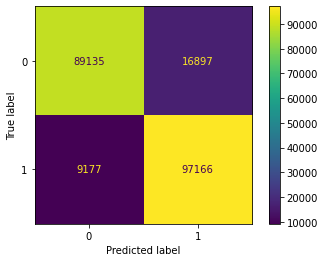

In [105]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf,X_test,y_test)  
plt.show()

In [106]:
from sklearn.metrics import f1_score
precision_score_dtc = precision_score(y_test,y_test_pred_dtc)
recall_score_dtc = recall_score(y_test,y_test_pred_dtc)
f1_score_dtc = f1_score(y_test,y_test_pred_dtc)



print(precision_score_dtc)
print(recall_score_dtc)
print(f1_score_dtc)

0.8518625671777877
0.9137037698767196
0.8817001352050308


In [107]:
# Get the roc_auc score for train and test dataset
train_auc_dtc = roc_auc_score(y_train,y_train_pred_proba_dtc)
test_auc_dtc = roc_auc_score(y_test,y_test_pred_proba_dtc)

print(train_auc_dtc)
print(test_auc_dtc)

0.9899218434957495
0.9075335855186011


Descision tree classifier model with hyperparameter tuning

In [108]:
parameter_dict ={
    'max_features' : [3,5,7],
    'max_depth': [5, 10,30],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [109]:
#Import decision tree classifier model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Create a DTC Classifier
dtc_clf = DecisionTreeClassifier()
dtc_clf_cv = GridSearchCV(dtc_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
dtc_clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................max_depth=5, max_features=3; total time=   0.3s
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=3; total time=   0.2s
[CV] END ........................max_depth=5, max_features=3; total time=   0.3s
[CV] END ........................max_depth=5, max_features=3; total time=   0.3s
[CV] END ........................max_depth=5, max_features=5; total time=   0.4s
[CV] END ........................max_depth=5, max_features=5; total time=   0.3s
[CV] END ........................max_depth=5, max_features=5; total time=   0.3s
[CV] END ........................max_depth=5, max_features=5; total time=   0.3s
[CV] END ........................max_depth=5, max_features=5; total time=   0.4s
[CV] END ........................max_depth=5, max_features=7; total time=   0.5s
[CV] END ........................max_depth=5, max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 30], 'max_features': [3, 5, 7]},
             verbose=2)

In [110]:
# Decision tree best paramaters
dtc_clf_optimum = dtc_clf_cv.best_estimator_
dtc_clf_optimum

DecisionTreeClassifier(max_depth=30, max_features=3)

In [111]:
#model score train set

dtc_clf_optimum.score(X_train,y_train)

0.895239376320495

In [112]:
#model score test set

dtc_clf_optimum.score(X_test,y_test)

0.8661801059446733

In [113]:
y_train_pred_dtc_cv = dtc_clf_optimum.predict(X_train)
y_train_pred_proba_dtc_cv = dtc_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_dtc_cv = dtc_clf_optimum.predict(X_test)
y_test_pred_proba_dtc_cv = dtc_clf_optimum.predict_proba(X_test)[:,1]

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_test_pred_dtc_cv))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86    106032
           1       0.84      0.91      0.87    106343

    accuracy                           0.87    212375
   macro avg       0.87      0.87      0.87    212375
weighted avg       0.87      0.87      0.87    212375



In [116]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_dtc_cv = accuracy_score(y_train,y_train_pred_dtc_cv)
test_accuracy_dtc_cv = accuracy_score(y_test,y_test_pred_dtc_cv)

print("The accuracy on train dataset is", train_accuracy_dtc_cv)
print("The accuracy on test dataset is", test_accuracy_dtc_cv)




The accuracy on train dataset is 0.895239376320495
The accuracy on test dataset is 0.8661801059446733


In [117]:
# Get the confusion matrices for train and test
train_cm_dtc_cv = confusion_matrix(y_train,y_train_pred_dtc_cv)
test_cm_dtc_cv = confusion_matrix(y_test,y_test_pred_dtc_cv)

print(train_cm_dtc_cv)

print(test_cm_dtc_cv)

[[183735  32012]
 [ 13159 202277]]
[[86929 19103]
 [ 9317 97026]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


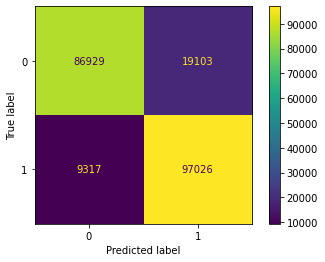

In [118]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc_clf_cv,X_test,y_test)  
plt.show()

In [119]:
from sklearn.metrics import f1_score
precision_score_dtc_cv = precision_score(y_test,y_test_pred_dtc_cv)
recall_score_dtc_cv = recall_score(y_test,y_test_pred_dtc_cv)
f1_score_dtc_cv = f1_score(y_test,y_test_pred_dtc_cv)



print(precision_score_dtc_cv)
print(recall_score_dtc_cv)
print(f1_score_dtc_cv)

0.8355018987505274
0.9123872751379969
0.8722535869682476


In [120]:
# Get the roc_auc score for train and test dataset
train_auc_dtc_cv = roc_auc_score(y_train,y_train_pred_proba_dtc_cv)
test_auc_dtc_cv = roc_auc_score(y_test,y_test_pred_proba_dtc_cv)

print(train_auc_dtc)
print(test_auc_dtc)

0.9899218434957495
0.9075335855186011


Random forest classifier

In [121]:
#Import random forest classifier model

from sklearn.ensemble import RandomForestClassifier

#Create a svm Classifier
rfc_clf = RandomForestClassifier(max_features ="sqrt" )

#Train the model using the training sets
rfc_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_features='sqrt')

In [122]:
#model score train set

rfc_clf.score(X_train,y_train)

0.9406887562821354

In [123]:
#model score test set

rfc_clf.score(X_test,y_test)

0.8773254855797528

In [124]:
y_train_pred_rfc = rfc_clf.predict(X_train)
y_train_pred_proba_rfc = rfc_clf.predict_proba(X_train)[:,1]


y_test_pred_rfc = rfc_clf.predict(X_test)
y_test_pred_proba_rfc = rfc_clf.predict_proba(X_test)[:,1]

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87    106032
           1       0.85      0.92      0.88    106343

    accuracy                           0.88    212375
   macro avg       0.88      0.88      0.88    212375
weighted avg       0.88      0.88      0.88    212375



In [127]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_rfc = accuracy_score(y_train,y_train_pred_rfc)
test_accuracy_rfc = accuracy_score(y_test,y_test_pred_rfc)

print("The accuracy on train dataset is", train_accuracy_rfc)
print("The accuracy on test dataset is", test_accuracy_rfc)




The accuracy on train dataset is 0.9406887562821354
The accuracy on test dataset is 0.8773254855797528


In [128]:
# Get the confusion matrices for train and test
train_cm_rfc = confusion_matrix(y_train,y_train_pred_rfc)
test_cm_rfc = confusion_matrix(y_test,y_test_pred_rfc)

print(train_cm_rfc)

print(test_cm_rfc)

[[194434  21313]
 [  4261 211175]]
[[88451 17581]
 [ 8472 97871]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


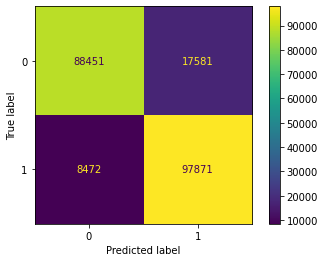

In [129]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_clf,X_test,y_test)  
plt.show()

In [130]:
from sklearn.metrics import f1_score
precision_score_rfc = precision_score(y_test,y_test_pred_rfc)
recall_score_rfc = recall_score(y_test,y_test_pred_rfc)
f1_score_rfc = f1_score(y_test,y_test_pred_rfc)



print(precision_score_rfc)
print(recall_score_rfc)
print(f1_score_rfc)

0.8477202646987493
0.9203332612395738
0.8825356748348699


In [131]:
# Get the roc_auc score for train and test dataset
train_auc_rfc = roc_auc_score(y_train,y_train_pred_proba_rfc)
test_auc_rfc = roc_auc_score(y_test,y_test_pred_proba_rfc)

print(train_auc_rfc)
print(test_auc_rfc)

0.9873272560405344
0.9482603302569332


Random forest classifier model with hyperparameter tuning

In [132]:
parameter_dict ={
    'n_estimators' : [20, 200],
    'max_features' : ['sqrt'],
    #'max_depth': [3, 5, 10, 30],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [133]:
#Import decision tree classifier model

#from sklearn.tree import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
#Create a DTC Classifier
rfc_clf = RandomForestClassifier()
rfc_clf_cv = GridSearchCV(rfc_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
rfc_clf_cv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................max_features=sqrt, n_estimators=20; total time=  10.1s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  10.1s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  10.3s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  10.4s
[CV] END .................max_features=sqrt, n_estimators=20; total time=  11.5s
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.8min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.8min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.9min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.9min
[CV] END ................max_features=sqrt, n_estimators=200; total time= 1.9min


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt'], 'n_estimators': [20, 200]},
             verbose=2)

In [134]:
# Decision tree best paramaters
rfc_clf_optimum = rfc_clf_cv.best_estimator_
rfc_clf_optimum

RandomForestClassifier(max_features='sqrt', n_estimators=20)

In [135]:
#model score train set

rfc_clf_optimum.score(X_train,y_train)

0.9377248175368695

In [136]:
#model score test set

rfc_clf_optimum.score(X_test,y_test)

0.8773254855797528

In [137]:
y_train_pred_rfc_cv = rfc_clf_optimum.predict(X_train)
y_train_pred_proba_rfc_cv = rfc_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_rfc_cv = rfc_clf_optimum.predict(X_test)
y_test_pred_proba_rfc_cv = rfc_clf_optimum.predict_proba(X_test)[:,1]

In [138]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test, y_test_pred_rfc_cv))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87    106032
           1       0.85      0.92      0.88    106343

    accuracy                           0.88    212375
   macro avg       0.88      0.88      0.88    212375
weighted avg       0.88      0.88      0.88    212375



In [140]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_rfc_cv = accuracy_score(y_train,y_train_pred_rfc_cv)
test_accuracy_rfc_cv = accuracy_score(y_test,y_test_pred_rfc_cv)

print("The accuracy on train dataset is", train_accuracy_rfc_cv)
print("The accuracy on test dataset is", test_accuracy_rfc_cv)




The accuracy on train dataset is 0.9377248175368695
The accuracy on test dataset is 0.8773254855797528


In [141]:
# Get the confusion matrices for train and test
train_cm_rfc_cv = confusion_matrix(y_train,y_train_pred_rfc_cv)
test_cm_rfc_cv = confusion_matrix(y_test,y_test_pred_rfc_cv)

print(train_cm_rfc_cv)

print(test_cm_rfc_cv)

[[194139  21608]
 [  5244 210192]]
[[88627 17405]
 [ 8648 97695]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


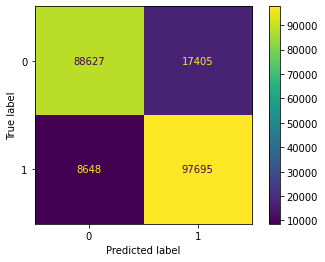

In [142]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_clf_cv,X_test,y_test)  
plt.show()

In [143]:
from sklearn.metrics import f1_score
precision_score_rfc_cv = precision_score(y_test,y_test_pred_rfc_cv)
recall_score_rfc_cv = recall_score(y_test,y_test_pred_rfc_cv)
f1_score_rfc_cv = f1_score(y_test,y_test_pred_rfc_cv)



print(precision_score_rfc_cv)
print(recall_score_rfc_cv)
print(f1_score_rfc_cv)

0.8487836663770634
0.9186782392823223
0.8823489566163752


In [144]:
# Get the roc_auc score for train and test dataset
train_auc_rfc_cv = roc_auc_score(y_train,y_train_pred_proba_rfc_cv)
test_auc_rfc_cv = roc_auc_score(y_test,y_test_pred_proba_rfc_cv)

print(train_auc_dtc)
print(test_auc_dtc)

0.9899218434957495
0.9075335855186011


XGB classifier

In [145]:
#Import XGB classifier model

import xgboost as xgb

#Create a svm Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic")

#Train the model using the training sets
xgb_clf.fit(X_train, y_train.values.ravel())

XGBClassifier()

In [146]:
#model score train set

xgb_clf.score(X_train,y_train)

0.8552354800629896

In [147]:
#model score test set

xgb_clf.score(X_test,y_test)

0.8565179517363155

In [148]:
y_train_pred_xgb = xgb_clf.predict(X_train)
y_train_pred_proba_xgb = xgb_clf.predict_proba(X_train)[:,1]


y_test_pred_xgb = xgb_clf.predict(X_test)
y_test_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85    106032
           1       0.82      0.91      0.86    106343

    accuracy                           0.86    212375
   macro avg       0.86      0.86      0.86    212375
weighted avg       0.86      0.86      0.86    212375



In [151]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_xgb = accuracy_score(y_train,y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test,y_test_pred_xgb)

print("The accuracy on train dataset is", train_accuracy_xgb)
print("The accuracy on test dataset is", test_accuracy_xgb)




The accuracy on train dataset is 0.8552354800629896
The accuracy on test dataset is 0.8565179517363155


In [152]:
# Get the confusion matrices for train and test
train_cm_xgb = confusion_matrix(y_train,y_train_pred_xgb)
test_cm_xgb = confusion_matrix(y_test,y_test_pred_xgb)

print(train_cm_xgb)

print(test_cm_xgb)

[[172911  42836]
 [ 19584 195852]]
[[85194 20838]
 [ 9634 96709]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


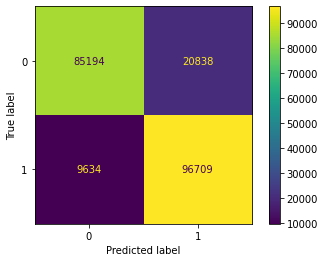

In [153]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf,X_test,y_test)  
plt.show()

In [154]:
from sklearn.metrics import f1_score
precision_score_xgb = precision_score(y_test,y_test_pred_xgb)
recall_score_xgb = recall_score(y_test,y_test_pred_xgb)
f1_score_xgb = f1_score(y_test,y_test_pred_xgb)



print(precision_score_xgb)
print(recall_score_xgb)
print(f1_score_xgb)

0.8227262286574731
0.9094063549081745
0.8638974496404483


In [155]:
# Get the roc_auc score for train and test dataset
train_auc_xgb = roc_auc_score(y_train,y_train_pred_proba_xgb)
test_auc_xgb = roc_auc_score(y_test,y_test_pred_proba_xgb)

print(train_auc_xgb)
print(test_auc_xgb)

0.9464069102380981
0.9468188192551839


XGBoost classifier model with hyperparameter tuning

In [156]:
parameter_dict ={
    'n_estimators' : [100, 200],
    'max_depth': [3, 10],
    #'min_samples_leaf': [5, 10,15 20]
    }

In [157]:
#using grid search perform hyperparameter tuning on XGB

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective="binary:logistic")
xgb_clf_cv = GridSearchCV(xgb_clf,param_grid=parameter_dict,verbose = 2, cv=5)
#Train the model using the training sets
xgb_clf_cv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=  23.9s
[CV] END ......................max_depth=3, n_estimators=100; total time=  21.9s
[CV] END ......................max_depth=3, n_estimators=100; total time=  25.1s
[CV] END ......................max_depth=3, n_estimators=100; total time=  21.4s
[CV] END ......................max_depth=3, n_estimators=100; total time=  23.2s
[CV] END ......................max_depth=3, n_estimators=200; total time=  42.9s
[CV] END ......................max_depth=3, n_estimators=200; total time=  44.0s
[CV] END ......................max_depth=3, n_estimators=200; total time=  43.8s
[CV] END ......................max_depth=3, n_estimators=200; total time=  45.4s
[CV] END ......................max_depth=3, n_estimators=200; total time=  43.7s
[CV] END .....................max_depth=10, n_estimators=100; total time= 1.2min
[CV] END .....................max_depth=10, n_est

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 10], 'n_estimators': [100, 200]},
             verbose=2)

In [158]:
# Decision tree best paramaters
xgb_clf_optimum = xgb_clf_cv.best_estimator_
xgb_clf_optimum

XGBClassifier(max_depth=10, n_estimators=200)

In [159]:
#model score train set

xgb_clf_optimum.score(X_train,y_train)

0.8689651493681337

In [160]:
#model score test set

xgb_clf_optimum.score(X_test,y_test)

0.8641365509123013

In [161]:
y_train_pred_xgb_cv = xgb_clf_optimum.predict(X_train)
y_train_pred_proba_xgb_cv = xgb_clf_optimum.predict_proba(X_train)[:,1]


y_test_pred_xgb_cv = xgb_clf_optimum.predict(X_test)
y_test_pred_proba_xgb_cv = xgb_clf_optimum.predict_proba(X_test)[:,1]

In [162]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_test, y_test_pred_xgb_cv))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86    106032
           1       0.84      0.90      0.87    106343

    accuracy                           0.86    212375
   macro avg       0.87      0.86      0.86    212375
weighted avg       0.87      0.86      0.86    212375



In [164]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Calculating accuracy on train and test
train_accuracy_xgb_cv = accuracy_score(y_train,y_train_pred_xgb_cv)
test_accuracy_xgb_cv = accuracy_score(y_test,y_test_pred_xgb_cv)

print("The accuracy on train dataset is", train_accuracy_xgb_cv)
print("The accuracy on test dataset is", test_accuracy_xgb_cv)




The accuracy on train dataset is 0.8689651493681337
The accuracy on test dataset is 0.8641365509123013


In [165]:
# Get the confusion matrices for train and test
train_cm_xgb_cv = confusion_matrix(y_train,y_train_pred_xgb_cv)
test_cm_xgb_cv = confusion_matrix(y_test,y_test_pred_xgb_cv)

print(train_cm_xgb_cv)

print(test_cm_xgb_cv)

[[178960  36787]
 [ 19713 195723]]
[[87481 18551]
 [10303 96040]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


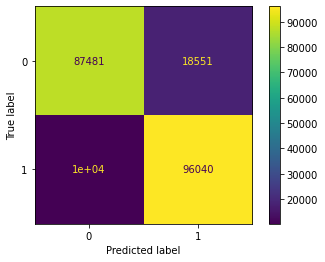

In [166]:
#visulaise CM
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf_optimum,X_test,y_test)  
plt.show()

In [167]:
from sklearn.metrics import f1_score
precision_score_xgb_cv = precision_score(y_test,y_test_pred_xgb_cv)
recall_score_xgb_cv = recall_score(y_test,y_test_pred_xgb_cv)
f1_score_xgb_cv = f1_score(y_test,y_test_pred_xgb_cv)



print(precision_score_xgb_cv)
print(recall_score_xgb_cv)
print(f1_score_xgb_cv)

0.8381111954691032
0.9031153907638491
0.8693999112857234


In [174]:
# Get the roc_auc score for train and test dataset
train_auc_xgb_cv = roc_auc_score(y_train,y_train_pred_proba_xgb_cv)
test_auc_xgb_cv = roc_auc_score(y_test,y_test_pred_proba_xgb_cv)

print(train_auc_xgb_cv)
print(test_auc_xgb_cv)

0.9557789480777504
0.952193705671187


dataframe of scores

In [175]:
model_name= ['logistic_regression_model','Descision_tree(baseline)','Decsion tree cv','random forest','random forest cv','XGB model','XGB model CV']
accuracy_score_train_set = [train_accuracy_log,train_accuracy_dtc,train_accuracy_dtc_cv,train_accuracy_rfc,train_accuracy_rfc_cv,train_accuracy_xgb,train_accuracy_xgb_cv]
accuracy_score_test_set= [test_accuracy_log,test_accuracy_dtc,test_accuracy_dtc_cv,test_accuracy_rfc,test_accuracy_rfc_cv,test_accuracy_xgb,test_accuracy_xgb_cv]
precision_score=[precision_score_logr,precision_score_dtc,precision_score_dtc_cv,precision_score_rfc,precision_score_rfc_cv,precision_score_xgb,precision_score_xgb_cv]
recall_score= [recall_score_logr,recall_score_dtc,recall_score_dtc_cv,recall_score_rfc,recall_score_rfc_cv,recall_score_xgb,recall_score_xgb_cv]
f1_score=[f1_score_logr,f1_score_dtc,f1_score_dtc_cv,f1_score_rfc,f1_score_rfc_cv,f1_score_xgb,f1_score_xgb_cv]
auc_score_train_set=[train_auc_log,train_auc_dtc,train_auc_dtc_cv,train_auc_rfc,train_auc_rfc_cv,train_auc_xgb,train_auc_xgb_cv]
auc_score_test_set=[test_auc_log,test_auc_dtc,test_auc_dtc_cv,test_auc_rfc,test_auc_rfc_cv,test_auc_xgb,test_auc_xgb_cv]






In [176]:
dict = {'model_name': model_name,
        'accuracy_score_train_set': accuracy_score_train_set,
        'accuracy_score_test_set': accuracy_score_test_set,
        'precision_score': precision_score,
        'recall_score':recall_score,
        'f1_score':f1_score,
        'auc_score_train_set':auc_score_train_set,
        'auc_score_test_set':auc_score_test_set
        } 

In [177]:
scores_df_SMOTETOMEK = pd.DataFrame(dict)

In [178]:
scores_df_SMOTETOMEK

,model_name,accuracy_score_train_set,accuracy_score_test_set,precision_score,recall_score,f1_score,auc_score_train_set,auc_score_test_set
0,logistic_regression_model,0.852151,0.853325,0.843960,0.867467,0.855552,0.945400,0.946063
1,Descision_tree(baseline),0.940758,0.877227,0.851863,0.913704,0.881700,0.989922,0.907534
2,Decsion tree cv,0.895239,0.866180,0.835502,0.912387,0.872254,0.971318,0.930868
3,random forest,0.940689,0.877325,0.847720,0.920333,0.882536,0.987327,0.948260
4,random forest cv,0.937725,0.877325,0.848784,0.918678,0.882349,0.987033,0.942400
5,XGB model,0.855235,0.856518,0.822726,0.909406,0.863897,0.946407,0.946819
6,XGB model CV,0.868965,0.864137,0.838111,0.903115,0.869400,0.955779,0.952194


In [407]:
scores_df_SMOTE

,model_name,accuracy_score_train_set,accuracy_score_test_set,precision_score,recall_score,f1_score,auc_score_train_set,auc_score_test_set
0,logistic_regression_model,0.850186,0.850846,0.842918,0.862329,0.852513,0.944451,0.945324
1,Descision_tree(baseline),0.941710,0.873473,0.847148,0.911325,0.878065,0.990138,0.902831
2,Decsion tree cv,0.891067,0.863372,0.831039,0.912135,0.869701,0.968655,0.930671
3,random forest,0.941664,0.873189,0.842870,0.917338,0.878529,0.987400,0.946164
4,random forest cv,0.938506,0.874078,0.844769,0.916519,0.879182,0.987143,0.940157
5,XGB model,0.852015,0.853852,0.815446,0.914648,0.862203,0.945399,0.946198
6,XGB model CV,0.869306,0.862753,0.838000,0.899299,0.867568,0.955025,0.951298


In [408]:
scores_df_imbalanced

,model_name,accuracy_score_train_set,accuracy_score_test_set,precision_score,recall_score,f1_score,auc_score_train_set,auc_score_test_set
0,logistic_regression_model,0.877671,0.879332,0.000000,0.000000,0.000000,0.836356,0.836695
1,Descision_tree(baseline),0.955283,0.841118,0.281332,0.203725,0.236320,0.985413,0.625799
2,Decsion tree cv,0.877675,0.879365,0.528571,0.002506,0.004988,0.812092,0.811678
3,random forest,0.955166,0.838813,0.283607,0.220047,0.247817,0.978016,0.751458
4,random forest cv,0.949599,0.840080,0.283082,0.212259,0.242607,0.975722,0.722385
5,XGB model,0.877671,0.879332,0.000000,0.000000,0.000000,0.839413,0.838456
6,XGB model CV,0.878077,0.879463,0.614286,0.002912,0.005797,0.847546,0.838201


Consequently, when you have a data imbalance between positive and negative samples, you should always use F1-score because ROC averages over all possible thresholds!